# **CSMODEL MCO 2 — Group 8**

Members:
1.   **ALABAT**, Jeanne Hazel W.
2.   **ANG**, Germaine Richie C.
3.   **DE RAMOS**, Ghrazielle Rei A.
4.   **JALANDONI**, Cassandra Erika R.



## Import Libraries

For this Machine Project, the group will be using the Libraries introduced in the CSMODEL course, namely **`pandas`** and **`matplotlib`**, which are used in the graded and practice exercise Jupyter Notebooks.
* **`pandas`** is a software library for Python that is designed for data manipulation and data analysis.
* **`matplotlib`** is a software libary for data visualization, which allows us to easily render various types of graphs.

For the statistical functions, the group will be using **`scipy`**, specifically, the **`stats`** submodule also introduced in the Jupyter Notebooks of the CSMODEL course. The **[`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)** module provides a number of probability distribution functions, summary and frequency statistics, correlation functions, statistical tests, and more.

Lastly, the group will also be using **`sklearn`** for machine learning tasks, wherein clustering will be done in the case of this project. Scikit-learn library empowers the group to perform in-depth clustering analysis on the data by providing the following:

*  **`OneHotEncoder`** transforms each categorical feature into a set of binary features, with one feature for each category
*   **`KMeans`** a popular algorithm for grouping data points into predefined clusters and sorts data points based on similarity metrics like distance by specifying the number of clusters.
*   **`silhouette_score`** evaluate the quality of these clusters, with higher scores indicating better separation between groups.
*   **`f_oneway`** function is used for performing Analysis of Variance (ANOVA) tests.

This comprehensive toolkit of libraries will enable the group a thorough exploration of the dataset **`Life Expectancy Based on Different Locations`** and the extraction of its valuable insights.





In [ ]:
# For Data Manipulation, Analysis, and Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For Statistical Functions
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Sets the Chart Themes
import seaborn as sns

# For Preprocessing: One Hot Encoding
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# For Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For Statistical Inference
from scipy.stats import f_oneway

# Python file with Clustering Functions
from phase2 import KMeans as KMeans_phase2

# **I. Dataset Description**

The dataset **`“Life Expectancy Based on Different Locations“`** is intended to uncover the patterns that affect the life expectancy of different geographical locations across different years by examining key features such as adult mortality, alcohol consumption, etc. Analyzing the dataset will provide insights into the complex interaction of these various factors affecting global life expectancy.

The dataset was built using available data from reputable sources such as the World Health Organization (WHO), the United Nations (UN), and the World Bank. Moreover, it was crafted to include relevant features to life expectancy. The data collected from these sources provide reliable and credible insights to the patterns existing among the different factors that may affect life expectancy.

> **Dataset Link:** [https://www.kaggle.com/datasets/saurabhbadole/life-expectancy-based-on-geographic-locations](https://)





## **Loading the Dataset**

In loading the previously described dataset, the following code snippet reads information from a file exctracted from Kaggle, named **`”LifeExpectancy.csv”`** and stores it in a structured format. Finally, for visuality, the second line of code displays the **first five rows of the data** stored within the file, providing a preliminary look at its contents. This initial glimpse helps understand the type of information the file holds and how it's organized, just as how it is previewed from Kaggle.



In [ ]:
# Read the Dataset File
lifeExpectancy_df = pd.read_csv("LifeExpectancy.csv")

# Display the First Five Rows of Data
lifeExpectancy_df.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## **Structure of Dataset**

In [ ]:
# Rename Dataset Columns
lifeExpectancy_df = lifeExpectancy_df.rename(columns=lambda x: x.strip())
lifeExpectancy_df = lifeExpectancy_df.rename(columns={'thinness  1-19 years': 'thinness 10-19 years',
                                                      'BMI': 'BMI'})

In [ ]:
# Display DataFrame Summary
lifeExpectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

For the structure, the dataset contains a total of 2928 rows which represents the record of a geographical location across different year and 22 columns that represent the different characteristics or variables of the dataset. The characteristics or variables of the dataset are as follows:

1. **`Country`** - is the name of the country (183 countries)
2. **`Year`** - is the year that the record was observed (2000 - 2015)
3. **`Status`** - indicates whether the country is developing or developed
4. **`Life Expectancy`** - is the average number years a person is expected to live at birth
5. **`Adult Mortality`** -  is the probability of dying between the ages of 15 and 60 years old per 1000 individuals
6. **`infant deaths`** - is the number of infant deaths per 1000 people
7. **`Alcohol`** - is the average alcohol consumed measured in liters per person
8. **`percentage expenditure`**- is the percentage of the GDP that is spent on health
9. **`Hepatitis B`** - refers to the percentage of Hepatitis B immunization among 1-year olds
10. **`Measles`** - is the number of measles cases reported per 1000 individuals
11. **`BMI`** - is the average Body Mass Index of the population of the country
12. **`under-five deaths`** - is the number of deaths that occur among those under the age of 5 per 1000 individuals
13. **`Polio`** - refers to the percentage of Polio immunization among 1-year olds
14. **`Total expenditure`** - refers to the government’s total expenditure on health as a percentage of GDP
15. **`Diphteria`** - refers to the percentage of Diphtheria tetanus toxoid and pertussis immunization among 1-year olds
16. **`HIV/AIDS`** - refers to the number of children under the age of 5 who die from HIV/AIDS for every 1,000 live births
17. **`GDP`** - is the Gross Domestic Product per capita measured in USD
18. **`Population`** - is the total population of the country
19. **`thinness 10-19 years`** - is the percentage of the prevalence of thinness among children and adolescents aged 10-19.
20. **`thinness 5-9 years`** - is the percentage of the prevalence of thinness among children aged 5-10.
21. **`Income composition of resources`** - refers to the income contribution to human development or Human Development Index (HDI) scaled from 0 to 1
22. **`Schooling`** - is the average number of years of schooling

# **II. Data Cleaning**

This section is dedicated to Data Cleaning and data preprocessing. This phase involves examining the raw data to ensure the quality of the data analysis. In this section, we handle the missing values, outliers, and inconsistencies present with by applying the needed data preprocessing techniques to the dataset in order to gain insights from the dataset.

## **Dropping Column/s of Dataset**

Columns that will not be used in the analysis are dropped from the dataframe.


In [ ]:
# Drop Column
lifeExpectancy_df = lifeExpectancy_df.drop(['thinness 5-9 years'], axis=1)

First we check the sum of missing values.

In [ ]:
# Calculate Sum of Missing Values per Column
lifeExpectancy_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 10-19 years                32
Income composition of resources    160
Schooling                          160
dtype: int64

Then we calculate the proportion of missing values to see what our threshold can be for dropping.

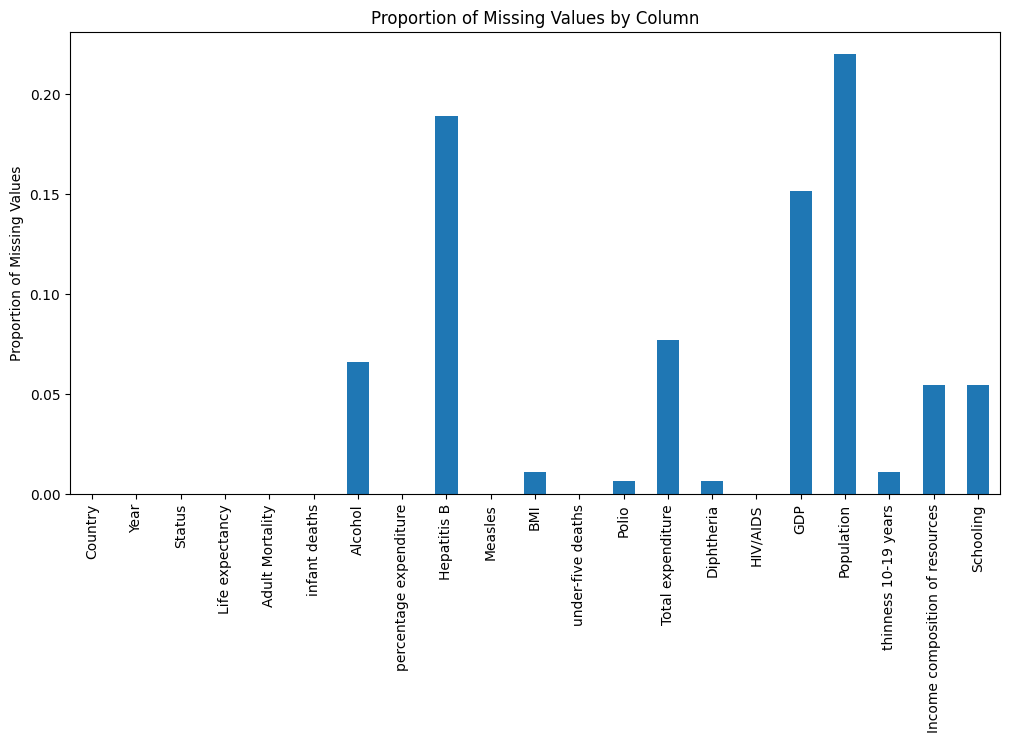

In [ ]:
# Get Missing Proportion of Each Column
missing_proportion = lifeExpectancy_df.isnull().mean()
missing_proportion.plot(kind='bar', figsize=(12, 6))

# Plot Proportion of Missing Values
plt.ylabel('Proportion of Missing Values')
plt.title('Proportion of Missing Values by Column')
plt.show()

In [ ]:
# Drop Columns Not Needed in Analysis
threshold = 0.2
lifeExpectancy_df = lifeExpectancy_df[lifeExpectancy_df.columns[lifeExpectancy_df.isnull().mean() < threshold]]
print("Columns retained:", lifeExpectancy_df.columns)

Columns retained: Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'thinness 10-19 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


## **Numerical Imputation, Mean or Median?**

In the context of data imputation, selecting an appropriate method to address missing values requires careful consideration of the underlying data distribution. Skewness, a measure of asymmetry in the data where values cluster towards one tail (positive or negative), plays a crucial role in this decision.

Thus, the group investigates the impact of skewness on selecting between mean and median imputation techniques. We begin by identifying the skewness of data columns containing missing values.


In [ ]:
# Get Columns with Missing Values
columns_with_missing = lifeExpectancy_df.columns[lifeExpectancy_df.isnull().any()]

# Check the Skew of Columns with Missing Values
skewness = lifeExpectancy_df[columns_with_missing].skew()

# Print Skewness
print("Skewness of columns:")
print(skewness)

Skewness of columns:
Alcohol                            0.587276
Hepatitis B                       -1.933774
BMI                               -0.230559
Polio                             -2.097958
Total expenditure                  0.577233
Diphtheria                        -2.072601
GDP                                3.202781
thinness 10-19 years               1.710626
Income composition of resources   -1.142142
Schooling                         -0.583884
dtype: float64


Then, we identify the difference between each missing column's mean and median.

In [ ]:
# Get Mean and Median of Columns with Missing Values
mean_values = lifeExpectancy_df[columns_with_missing].mean()
median_values = lifeExpectancy_df[columns_with_missing].median()

# Compare Mean and Median
comparison = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Difference': mean_values - median_values
})

# Print Comparison
print("Comparison of Mean and Median values for columns with missing values:")
print(comparison)

Comparison of Mean and Median values for columns with missing values:
                                        Mean      Median   Difference
Alcohol                             4.614856     3.77000     0.844856
Hepatitis B                        80.960842    92.00000   -11.039158
BMI                                38.235394    43.35000    -5.114606
Polio                              82.548298    93.00000   -10.451702
Total expenditure                   5.930163     5.75000     0.180163
Diphtheria                         82.321416    93.00000   -10.678584
GDP                              7494.210719  1764.97387  5729.236849
thinness 10-19 years                4.850622     3.30000     1.550622
Income composition of resources     0.627419     0.67700    -0.049581
Schooling                          11.999639    12.30000    -0.300361


Based on the information above, only the BMI column has low skewness and has a smaller difference as compared to the other columns. The rest of the columns with missing values have moderate to high skewness.

Therefore, only the BMI column will be imputated with its mean while the rest of the columns will be imputated with their median.

In [ ]:
# Set the Value to be Imputated
imputation_methods = {
    'Alcohol': 'median',
    'Hepatitis B': 'median',
    'BMI': 'mean',
    'Polio': 'median',
    'Total expenditure': 'median',
    'Diphtheria': 'median',
    'GDP': 'median',
    'thinness 10-19 years': 'median',
    'Income composition of resources': 'median',
    'Schooling': 'median'
}

for column, method in imputation_methods.items():
    if method == 'mean':
        lifeExpectancy_df[column] = lifeExpectancy_df[column].fillna(lifeExpectancy_df[column].mean())
    elif method == 'median':
        lifeExpectancy_df[column] = lifeExpectancy_df[column].fillna(lifeExpectancy_df[column].median())


Now, we check if any columns are still missing values.

In [ ]:
lifeExpectancy_df.isnull().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
thinness 10-19 years               False
Income composition of resources    False
Schooling                          False
dtype: bool

In [ ]:
lifeExpectancy_df.shape

(2928, 20)

In [ ]:
# Check for Columns with Missing Values
nan_variables = lifeExpectancy_df.columns[lifeExpectancy_df.isnull().any()].tolist()
print(nan_variables)

[]


## **Checking for Multiple Representations**

Lastly, we must check if there are multiple representations of country names.

In [ ]:
lifeExpectancy_df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Grenad

# **III. Exploratory Data Analysis**

This section delves into the initial phase of the data analysis journey: Exploratory Data Analysis (EDA). Through EDA, the group will gain and be able to explain a comprehensive understanding of the Life Expectancy data's content, format, and any potential inconsistencies or missing values. Furthermore, performing EDA will empower the group to identify and address any potential issues that might hinder further analysis, and help the group formulate our Research Question for in-depth understanding of this Dataset.

## **Q1: Which Year has the Highest Life Expectancy?**

In order to identify the year associated with the highest life expectancy, we can employ a grouping strategy. This involves segmenting the data by year and subsequently calculating descriptive statistics for life expectancy within each year.  Key statistics of interest include the **`mean`**, **`median`**, and **`standard deviation`**. The year with the **highest** mean or median life expectancy would be a strong candidate for the year with the greatest overall longevity.

In [ ]:
lifeExpectancy_df.groupby('Year').agg({'Life expectancy': ['mean', 'median', 'std']})

Life expectancy                  
                mean median        std
Year                                  
2000       66.750273   71.0  10.295528
2001       67.128962   71.2  10.189630
2002       67.351366   71.4  10.062469
2003       67.433333   71.1  10.127681
2004       67.646448   71.2  10.126409
2005       68.209290   71.6   9.799516
2006       68.667760   72.1   9.815171
2007       69.036066   72.4   9.618584
2008       69.427869   72.4   9.202612
2009       69.938251   72.6   8.989124
2010       70.048634   72.8   9.302959
2011       70.654098   73.3   8.925040
2012       70.916940   73.2   8.562151
2013       71.236066   73.2   8.413771
2014       71.536612   73.6   8.560831
2015       71.616940   73.9   8.123706

Based on our initial analysis, **life expectancy in 2015 appears to be higher than in 2000**, exhibiting both a **greater median and lower standard deviation (STD)**. To gain a clearer understanding of the life expectancy distribution across these years, we can leverage a boxplot visualization below.

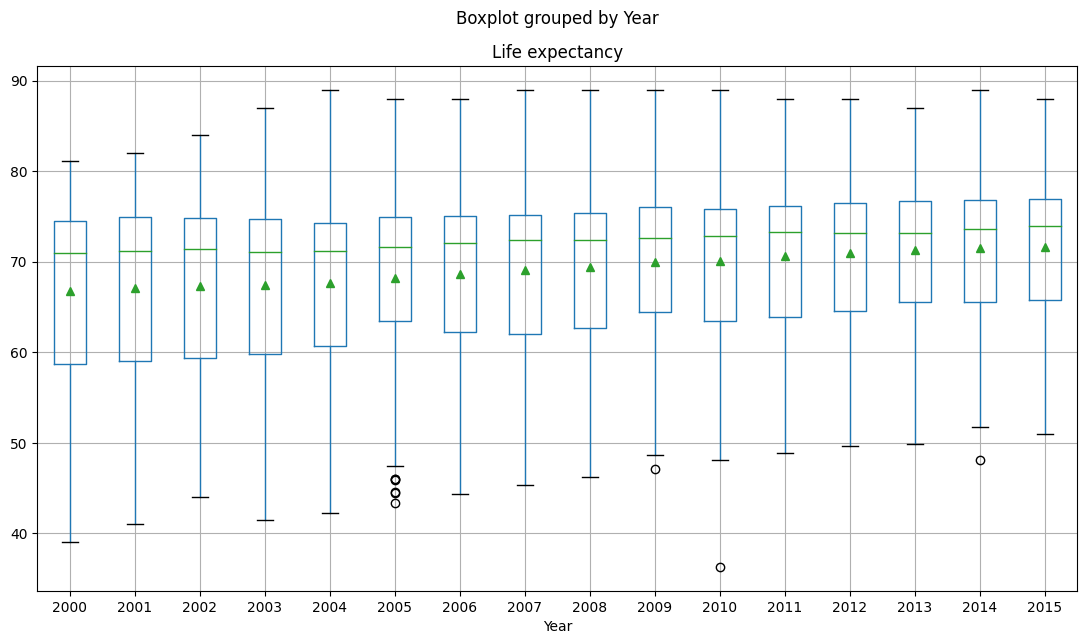

In [ ]:
# plot box plot of life expectancy by year
lifeExpectancy_df.boxplot('Life expectancy', by='Year', figsize=(13, 7), showmeans=True)
plt.show()

The visual inspection of the data—as seen in the boxplot figure above—suggests a **potential upward trend in life expectancy from 2000 to 2015**. This initial observation is supported by the apparent **minimum life expectancy in 2000 and the apparent maximum in 2015**.

To further investigate the distribution of life expectancy, particularly for the year 2015, we can employ descriptive statistics and data visualization techniques

array([[<Axes: title={'center': 'Life expectancy'}>]], dtype=object)

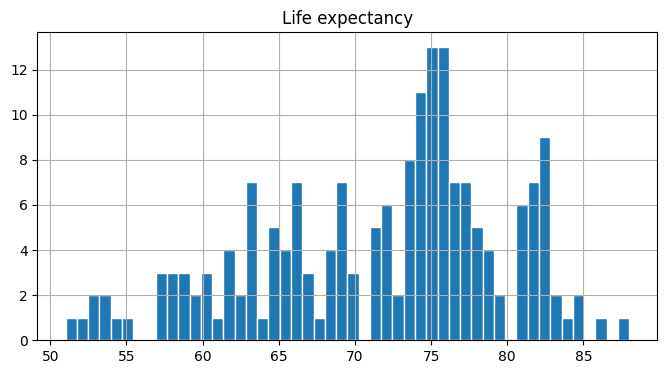

In [ ]:
# Group 2015
Y2015 = lifeExpectancy_df[(lifeExpectancy_df['Year'] == 2015)]

Y2015.hist('Life expectancy', bins=50, edgecolor='w', figsize=(8,4))

In [ ]:
Y2015['Life expectancy'].skew()

-0.4945967018337147

The life expectancy data for **2015 reveals a negative skew**, as evidenced by both the graph and the calculated skew statistic. This indicates a distribution where a larger portion of the population lived closer to the average life expectancy compared to those who lived significantly longer. In simpler terms, the graph likely shows a tail extending further to the left, **suggesting more people fell short of the average lifespan in 2015** than those who lived exceptionally long lives. This doesn't necessarily mean there were not outliers who lived very long lives, but the overall distribution leans towards the average.

## **Q2: Which year has the lowest adult mortality?**

To pinpoint the year with the lowest adult mortality rate, we can leverage a grouping strategy as we did with Q1 in finding the Highest Life Expectancy. This entails segmenting the data by year and subsequently calculating descriptive statistics for adult mortality within each year. Again, the essential statistics include the **`mean`**, **`median`**, and **`standard deviation`**. However, unlike Q1 looking for the highest, the year with the **lowest** mean or median adult mortality would be a strong candidate for the year with the greater overall survival rate among adults.

In [ ]:
adultMortality_df = lifeExpectancy_df.groupby('Year').agg({'Adult Mortality': ['mean', 'median', 'std']})
adultMortality_df.sort_values(('Adult Mortality','median'), ascending = True)

Adult Mortality                   
                mean median         std
Year                                   
2013      148.765027  135.0  106.673397
2014      148.688525  135.0  106.025532
2007      159.808743  136.0  126.038985
2005      167.633880  138.0  135.377463
2012      148.792350  138.0  108.617944
2015      152.863388  138.0   97.561184
2011      156.535519  139.0  110.186792
2010      161.863388  142.0  120.435555
2003      169.131148  144.0  136.528282
2006      170.404372  144.0  130.616545
2002      171.437158  146.0  133.472330
2009      163.393443  147.0  117.136289
2001      175.169399  151.0  141.147685
2000      181.475410  155.0  140.275938
2008      174.519126  157.0  120.419771
2004      186.262295  158.0  142.278928

In the initial analysis, it can be seen how **2013 has the lowest adult mortality** rate by having the lowest mean. To gain a clearer understanding of the adult mortality distribution across these years, like we did from the previous question, we can leverage a boxplot visualization below.

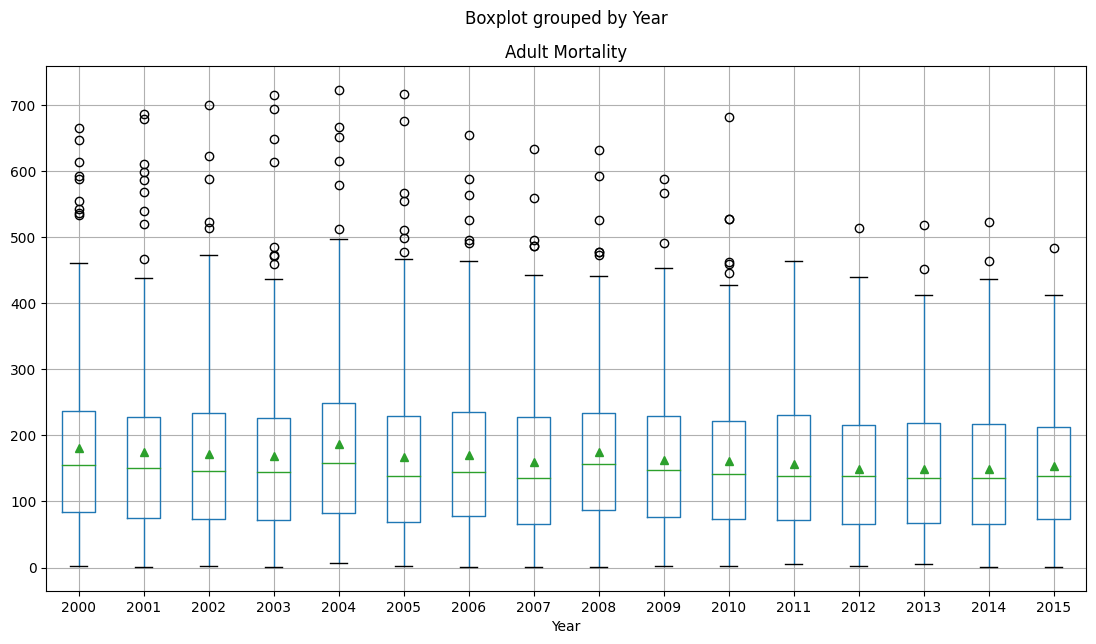

In [ ]:
lifeExpectancy_df.boxplot('Adult Mortality', by='Year', figsize=(13, 7), showmeans=True)
plt.show()

With this analysis of the median of adult mortality across different years within the dataset using a boxplot, the **year 2013 stands out as having the lowest mortality rate**. This signifies that adults in 2013 had a greater chance of survival compared to adults in other years included in the data. This finding suggests potentially significant improvements in healthcare or other factors influencing adult mortality during that specific year. Further investigation into the data for 2013 alongside comparisons to other years might provide valuable insights into the reasons behind this observed decrease in adult mortality rates.

array([[<Axes: title={'center': 'Adult Mortality'}>]], dtype=object)

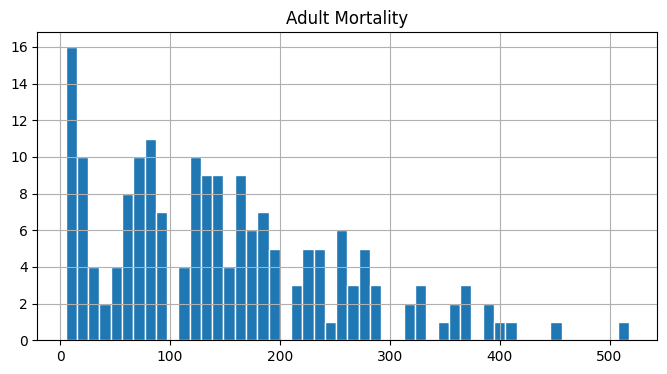

In [ ]:
# Group 2013
Y2013 = lifeExpectancy_df[(lifeExpectancy_df['Year'] == 2013)]

Y2013.hist('Adult Mortality', bins= 50, edgecolor='w', figsize=(8,4))

In [ ]:
# Get skew of adult mortality in 2013
Y2015['Adult Mortality'].skew()

0.7637063956970328

Inspection of the adult mortality distribution for 2013 using a histogram suggests **a positive skew**.  This implies that the distribution is asymmetric, with a longer tail extending towards the higher adult mortality values. The histogram shows a greater concentration of data points at the lower end of the mortality spectrum, with a smaller number of cases exhibiting significantly higher mortality rates.

This signifies that **more adults lived longer in 2013 compared to those who experienced significantly higher mortality rates**. Moreover, it suggests that outliers, those with very high mortality, are likely fewer in 2013 when compared to the prevalence of those with lower mortality rates. This finding warrants further investigation to understand the potential factors contributing to this observed skew in adult mortality for the year 2013.

## **Q3: Which year Has the Lowest Infant Deaths?**



Again, just as we did for the two previous questions, we can leverage a grouping strategy to pinpoint the year with the lowest infant mortality rate. To iterate, this entails segmenting the data by year and subsequently calculating descriptive statistics for infant deaths within each year—while key statistics of interest include the **`mean`**, **`median`**, and **`standard deviation`**. Lastly, following the analysis of the previous question for Lowest Adult Mortality rate, the year with the **lowest** mean or median infant death rate would be a strong candidate for the year with the greatest chance of infant survival.

In [ ]:
lifeExpectancy_df.groupby('Year').agg({'infant deaths': ['mean', 'median', 'std']})

infant deaths                   
              mean median         std
Year                                 
2000     37.540984    4.0  149.285320
2001     36.825137    4.0  148.416410
2002     35.584699    3.0  141.030361
2003     34.874317    3.0  140.246293
2004     33.644809    3.0  133.027261
2005     32.366120    3.0  125.805590
2006     31.808743    3.0  125.157534
2007     30.612022    3.0  118.157732
2008     29.568306    3.0  111.310646
2009     28.956284    3.0  110.749833
2010     27.928962    3.0  104.025305
2011     26.830601    3.0   97.353433
2012     26.338798    3.0   96.811105
2013     25.278689    3.0   90.216430
2014     24.557377    2.0   87.045749
2015     23.803279    2.0   83.683762

The initial calculated mean and median infant mortality rates from 2000 to 2015 reveals a positive trend, suggesting a decline in infant deaths over this period. Both the mean, representing the average mortality rate, and the median, representing the "middle" value, exhibit a **decrease in value** from 2000 to 2015. This finding provides initial evidence for an improvement in infant health outcomes during this timeframe.

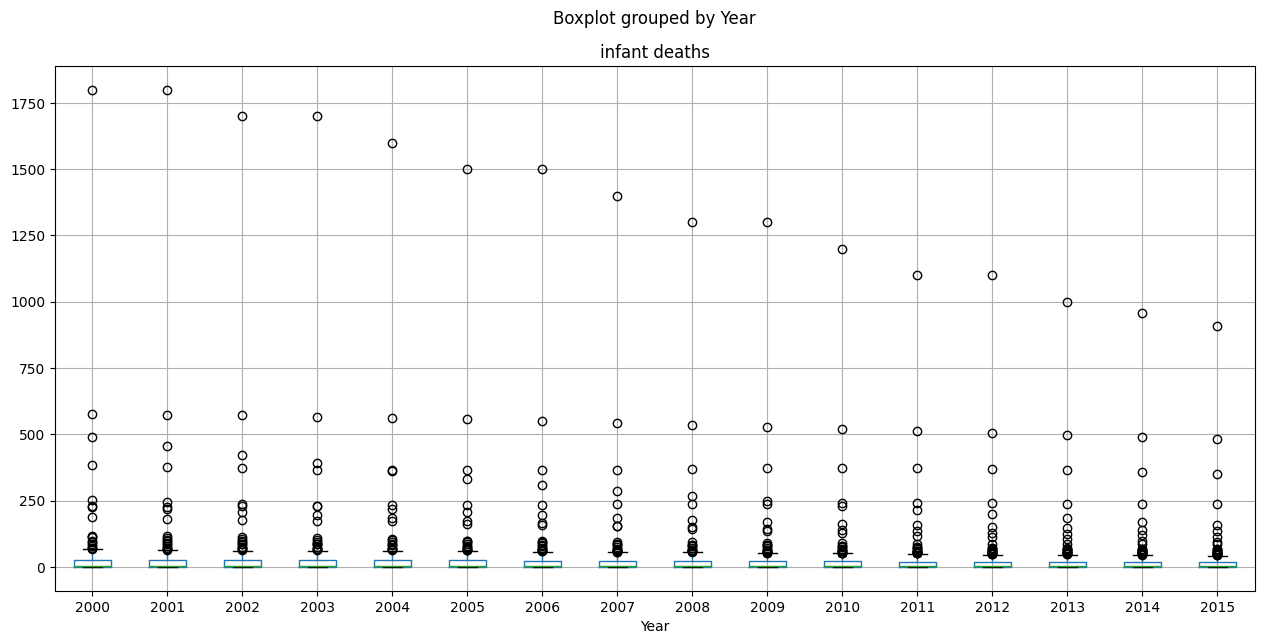

In [ ]:
lifeExpectancy_df.boxplot('infant deaths', by='Year', figsize=(15, 7))
plt.show()

To reiterate, the calculated mean and median above shows that there is a decline of infant deaths from 2000 to 2015. The corresponding box plot confirms this decline, however, it shows that there are outliers with high infant deaths recorded in each year. Moreover, the standard deviations for each year shows that the values highly vary from each other. Despite this, it shows that **the lowest infant deaths were recorded in 2015**.

array([[<Axes: title={'center': 'infant deaths'}>]], dtype=object)

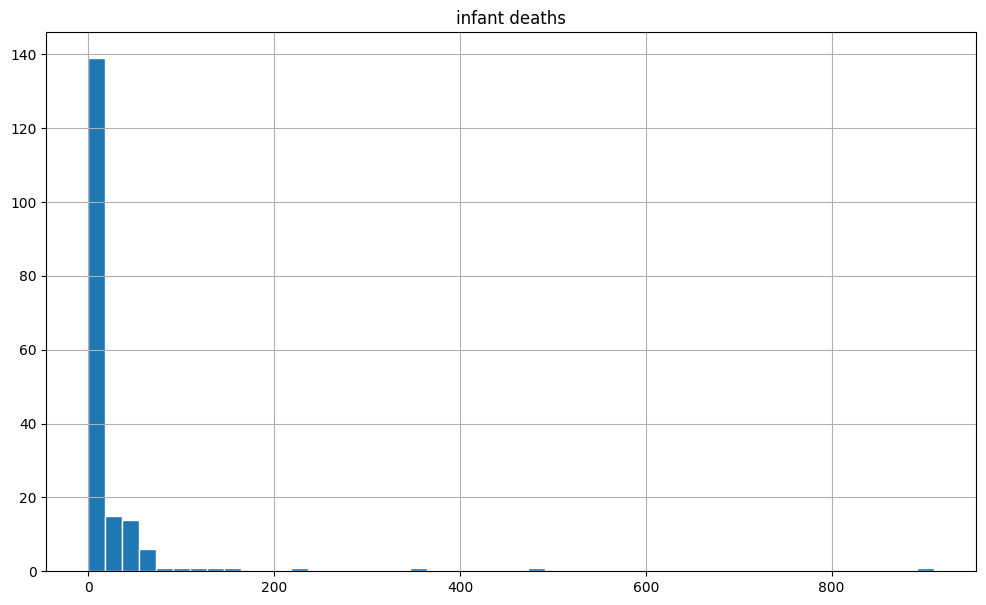

In [ ]:
# Group 2015
Y2015_infant = lifeExpectancy_df[(lifeExpectancy_df['Year'] == 2015)]

Y2015_infant.hist('infant deaths', bins= 50, edgecolor='w', figsize=(12,7))

In [ ]:
Y2015_infant['infant deaths'].skew()

7.980242997364922

The infant mortality data for 2015 paints a worrying picture with a **very high positive skew of 7.98**. While a positive skew typically suggests more infant survival (lower mortality rates), this extreme value indicates a significant imbalance in outcomes, as seen in the histogram above. We need to delve into the 2015 data to identify factors contributing to these severe deaths. Additionally, comparing the 2015 distribution to other years is essential to understanding if this is an ongoing problem or an anomaly is vital. By thoroughly analyzing the data and incorporating comparisons across years and its correlation to factors, we can aim to understand the cause of this concerning skew. While a single data point shouldn't be the sole basis for conclusions, this high skew serves as a strong red flag demanding further exploration.



## **Q4: How has the Life Expectancy Changed Over the Years for Developed vs. Developing Countries?**

To gain deeper insights into how life expectancy has changed for developed versus developing countries, we can adopt a grouping strategy similar to the one used in previous analyses. This approach involves segmenting the data based on two key factors: **`year`** and **`status`**. By segmenting the data by year, we can track changes in life expectancy over time. Additionally, categorizing countries as developed or developing allows us to analyze trends within each group.

Following this segmentation, we can calculate the **`mean life expectancy`** for each combination of year and development status. This will provide a clear picture of how average life expectancy has evolved within developed and developing countries over time. This approach facilitates a **comparative analysis**, enabling us to identify **potential disparities** in life expectancy trends between the two groups and understand how life expectancy has changed for each category over the years.

In [ ]:
# group by country status and year
life_expectancy_status = lifeExpectancy_df.groupby(['Year', 'Status']).agg({'Life expectancy': 'mean'}).unstack()

print(life_expectancy_status)

       Life expectancy           
Status       Developed Developing
Year                             
2000         76.803125  64.619868
2001         77.128125  65.009934
2002         77.546875  65.190728
2003         77.940625  65.206623
2004         78.384375  65.370861
2005         78.590625  66.009272
2006         79.131250  66.450331
2007         79.300000  66.860927
2008         78.931250  67.413907
2009         79.584375  67.894040
2010         80.146875  67.908609
2011         80.706250  68.523841
2012         80.443750  68.898013
2013         80.681250  69.234437
2014         81.137500  69.501987
2015         80.709375  69.690066


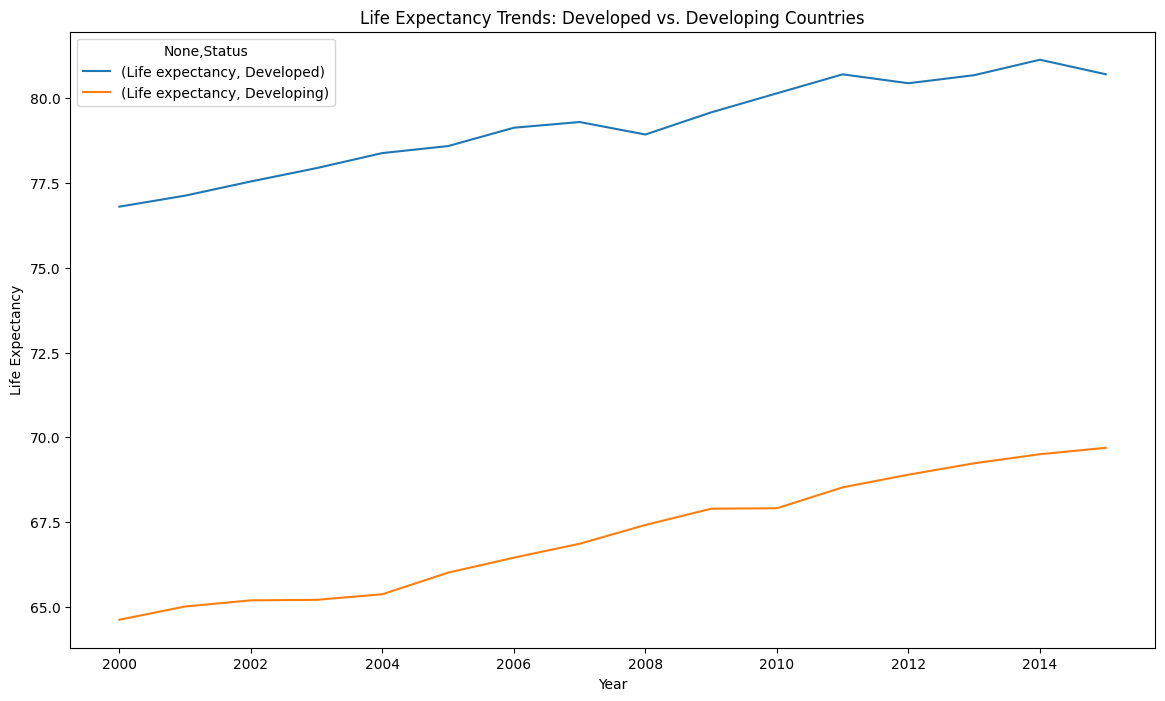

In [ ]:
life_expectancy_status = lifeExpectancy_df.groupby(['Year', 'Status']).agg({'Life expectancy': 'mean'}).unstack()

# plot life expectancy of developed vs developing countries
life_expectancy_status.plot(kind='line', figsize=(14, 8))
plt.title('Life Expectancy Trends: Developed vs. Developing Countries')
plt.ylabel('Life Expectancy')
plt.xlabel('Year')
plt.show()

This data offers insights into how life expectancy has changed over the years for developed and developing countries. In developed countries, life expectancy rose from 76.8 years (2000) to 80.71 years (2015), with a peak of 81.14 years in 2014. While there's a positive trend, the **slight decrease in 2015 indicates a potential shift**. Developing countries, on the other hand, experienced a more consistent increase, with life expectancy climbing from 64.62 years (2000) to 69.69 years (2015). This suggests steady improvement throughout the period. Notably, **developed countries consistently maintained a higher life expectancy throughout**.

In essence, while both groups saw an increase in life expectancy, **a disparity persists** between them. Further analysis with more data points and age-specific mortality rates could provide a clearer picture of these trends and potential explanations for the observed differences.

## **Q5: What are the Top Causes of Mortality in Countries with the Lowest Life Expectancy?**

Unveiling the leading causes of death in countries with the lowest life expectancy demands a focused analysis. We can achieve this by adopting a grouping strategy similar to previous analyses. This strategy involves segmenting the data based on their country, mortality. First, countries will be categorized based on the year, mortality, and the causes. Second, the analysis necessitates additional data on the primary causes of death within each country.

Following this segmentation, we can analyze how causes of death are distributed within the low life expectancy groups. Techniques like calculating proportions and identifying leading causes can reveal the most prevalent contributors to mortality in these countries. This targeted investigation allows us to hone in on the factors with the most significant impact on lifespans in the countries with the lowest life expectancy.

In [ ]:
#group the 10 countries with lowest life expectancy
lowest_life_expectancy_countries = lifeExpectancy_df.groupby('Country')['Life expectancy'].mean().nsmallest(10).index
lowest_life_expectancy_df = lifeExpectancy_df[lifeExpectancy_df['Country'].isin(lowest_life_expectancy_countries)]
lowest_life_expectancy_countries

Index(['Sierra Leone', 'Central African Republic', 'Lesotho', 'Angola',
       'Malawi', 'Chad', 'Côte d'Ivoire', 'Zimbabwe', 'Swaziland', 'Nigeria'],
      dtype='object', name='Country')

In [ ]:
# Columns relevant to mortality
mortality_columns = ['Year', 'Country', 'Adult Mortality', 'infant deaths', 'under-five deaths', 'HIV/AIDS', 'Measles']

# Analyze causes of mortality over the years in countries with the lowest life expectancy
mortality_stats_over_years = lowest_life_expectancy_df[mortality_columns]
mortality_stats_over_years.head()


,Year,Country,Adult Mortality,infant deaths,under-five deaths,HIV/AIDS,Measles
48,2015,Angola,335,66,98,1.9,118
49,2014,Angola,348,67,101,2.0,11699
50,2013,Angola,355,69,105,2.3,8523
51,2012,Angola,358,72,110,2.6,4458
52,2011,Angola,361,75,115,2.5,1449


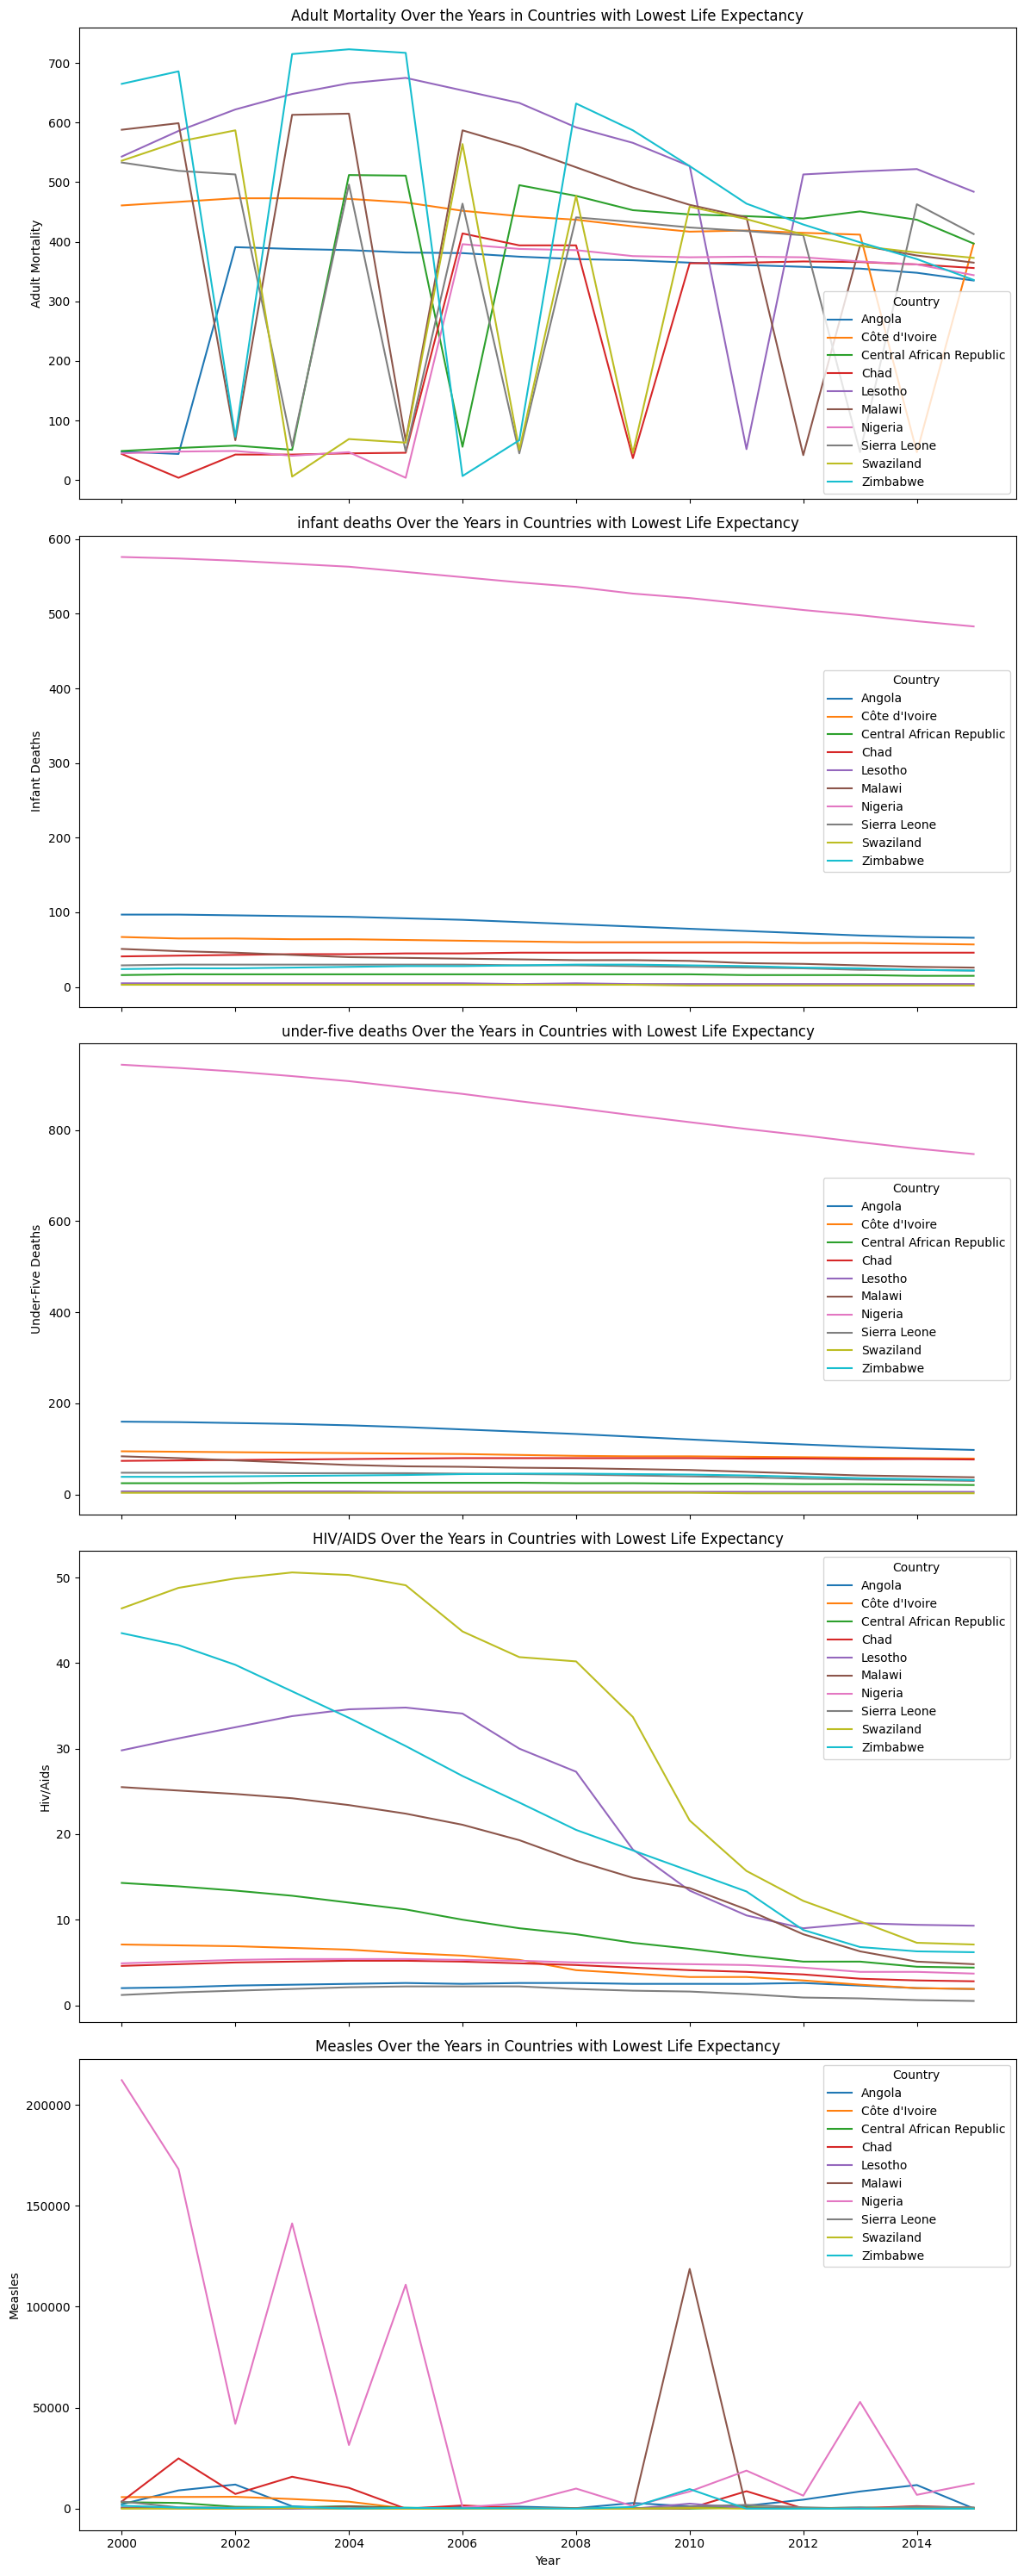

In [ ]:
# Set up the plot dimensions
fig, axes = plt.subplots(len(mortality_columns)-2, 1, figsize=(12, 30), sharex=True)

# Plot each mortality cause over the years
for i, col in enumerate(mortality_columns[2:]):
    sns.lineplot(data=mortality_stats_over_years, x='Year', y=col, hue='Country', ax=axes[i])
    axes[i].set_title(f'{col} Over the Years in Countries with Lowest Life Expectancy')
    axes[i].set_ylabel(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


In [ ]:
mortality_columns = ['Adult Mortality', 'infant deaths', 'under-five deaths', 'HIV/AIDS', 'Measles']

mortality_stats = lowest_life_expectancy_df.groupby('Country')[mortality_columns].mean().reset_index()
mortality_stats

,Country,Adult Mortality,infant deaths,under-five deaths,HIV/AIDS,Measles
0,Angola,328.5625,83.7500,132.6250,2.36875,3561.3125
1,Central African Republic,333.0625,16.5000,24.5000,8.98125,699.4375
2,Chad,227.7500,44.8750,78.1250,4.33750,4687.7500
3,Côte d'Ivoire,417.3125,61.5000,86.8125,4.68750,1708.2500
4,Lesotho,550.0625,4.5000,6.3125,22.96875,266.6875
5,Malawi,424.4375,37.1250,58.7500,16.68125,7559.4375
6,Nigeria,248.5000,535.6875,852.0625,4.83125,51653.9375
7,Sierra Leone,357.8125,27.5625,41.8750,1.51875,673.8750
8,Swaziland,339.0000,2.6250,3.6875,32.94375,49.1250
9,Zimbabwe,462.3750,26.5625,40.8125,23.26250,923.0000


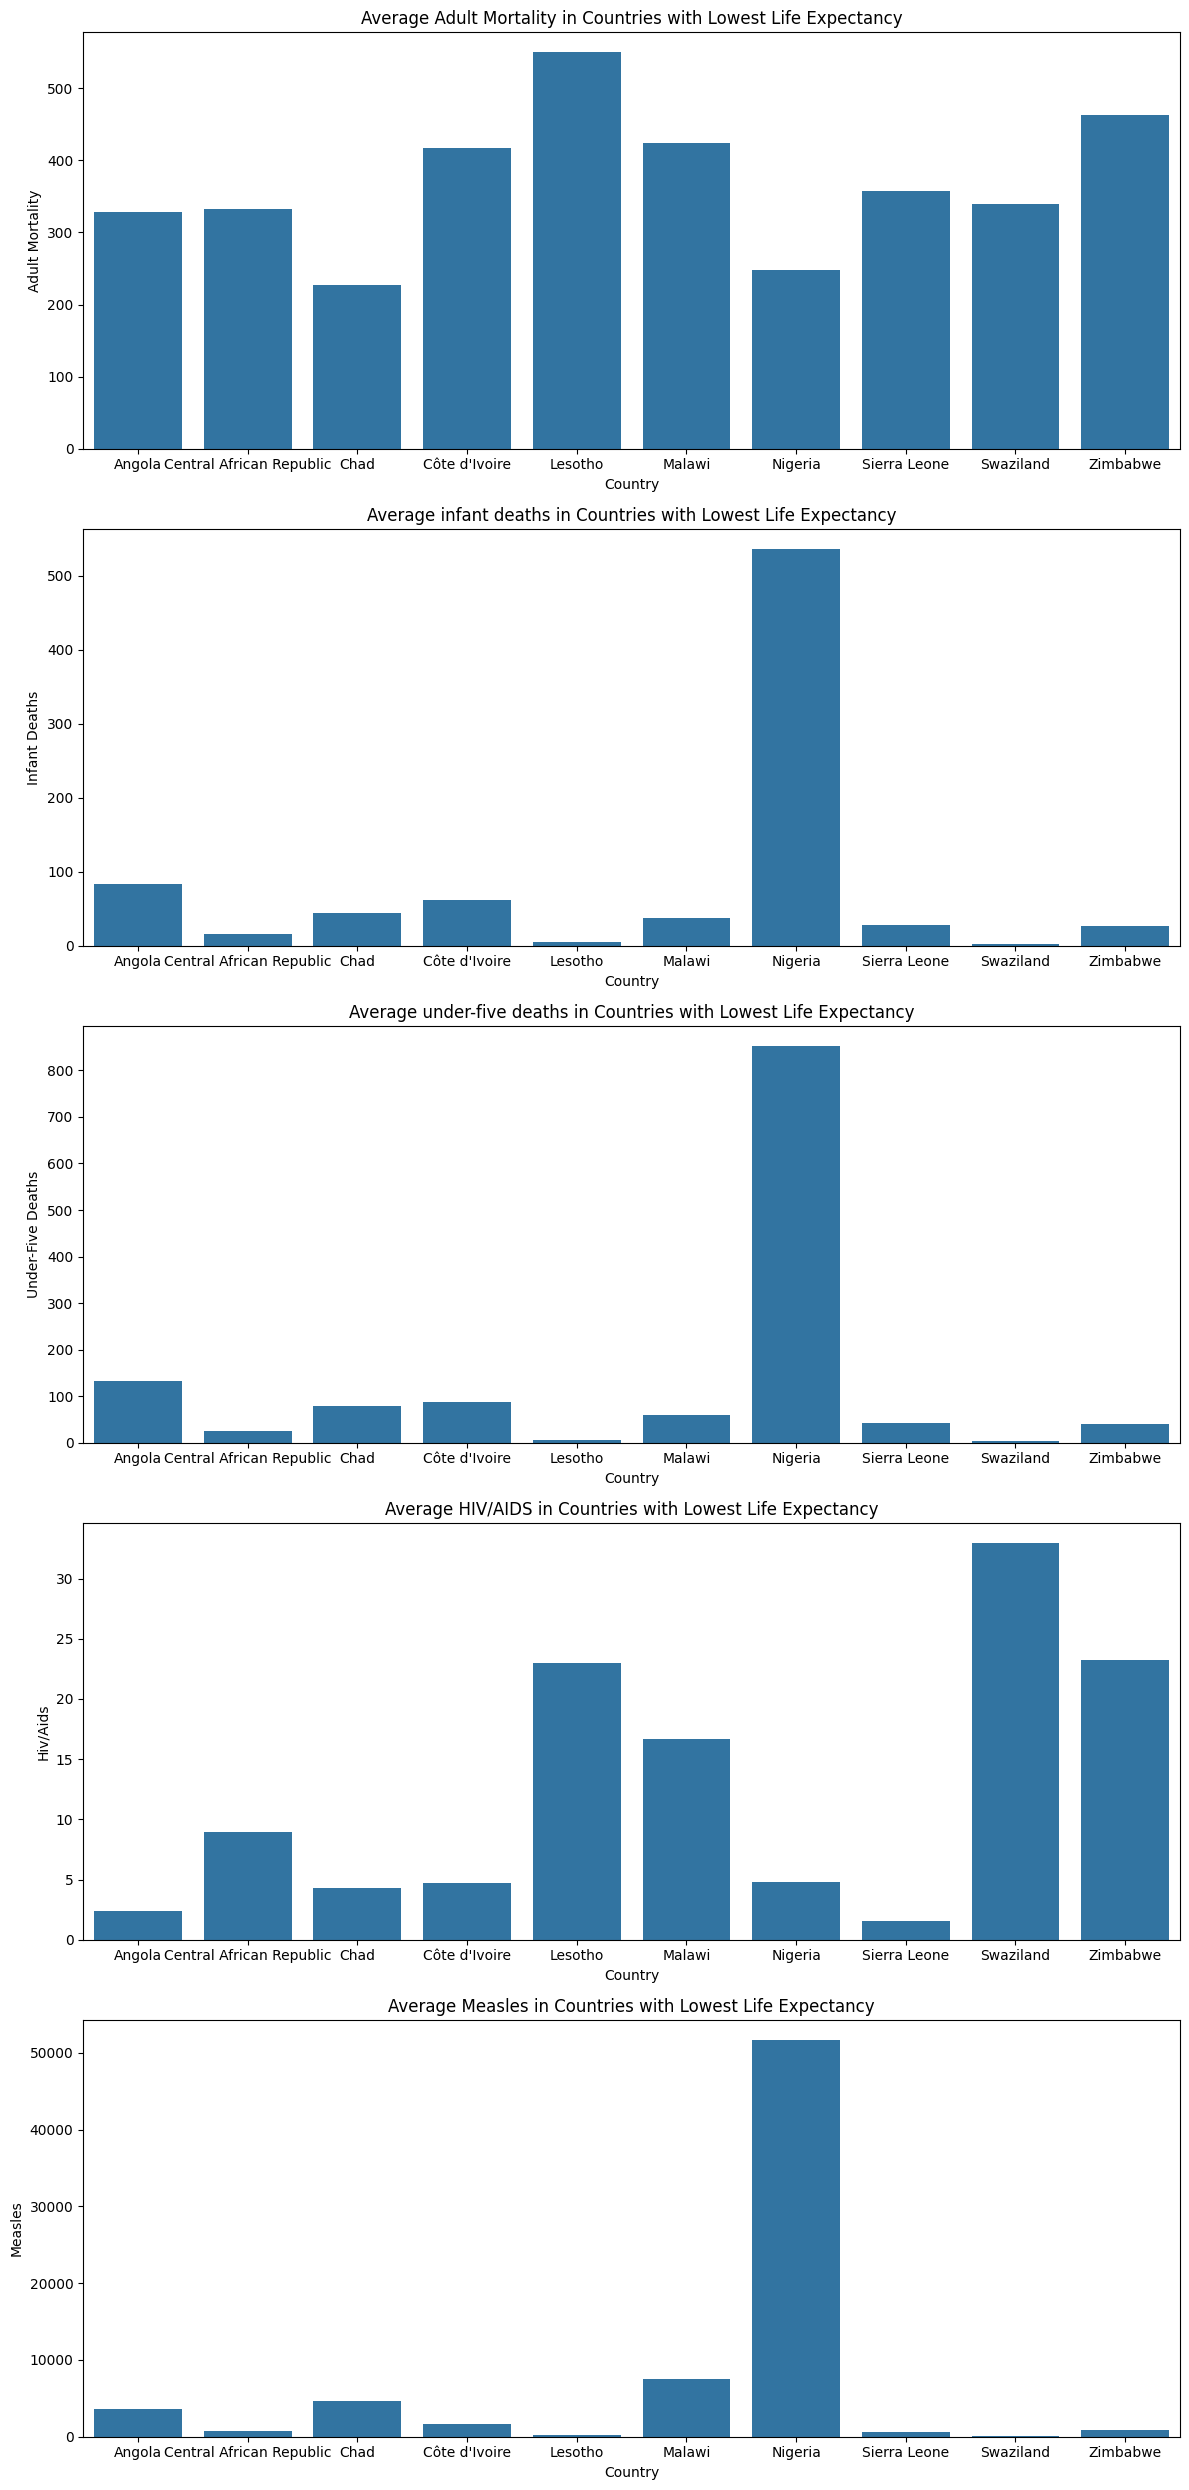

In [ ]:
fig, axes = plt.subplots(len(mortality_columns), 1, figsize=(12, 25))

for i, col in enumerate(mortality_columns):
    sns.barplot(data=mortality_stats, x='Country', y=col, ax=axes[i])
    axes[i].set_title(f'Average {col} in Countries with Lowest Life Expectancy')
    axes[i].set_xlabel('Country')
    axes[i].set_ylabel(col.replace('_', ' ').title())

plt.tight_layout()
plt.show()


An examination of the provided graphs reveals a positive trend, suggesting a general decline in the number of cases for various causes of mortality across the period 2000 to 2015. This indicates progress in healthcare and potentially improved living conditions.

However, it's important to acknowledge exceptions. Notably, Measles and HIV cases stand out with significantly higher numbers compared to other causes. Measles cases have peaked at over 50,000 in Nigeria, while HIV cases in Swaziland have surpassed 50 during the observed timeframe. These outliers highlight the need for continued focus on addressing these specific public health challenges.

This analysis underscores the importance of a multifaceted approach to healthcare. While a decline in overall mortality cases is encouraging, it's crucial to target persistent causes like Measles and HIV to achieve even greater health outcomes.


## **Q6: How do the Different Features of the Dataset Correlate with each other?**

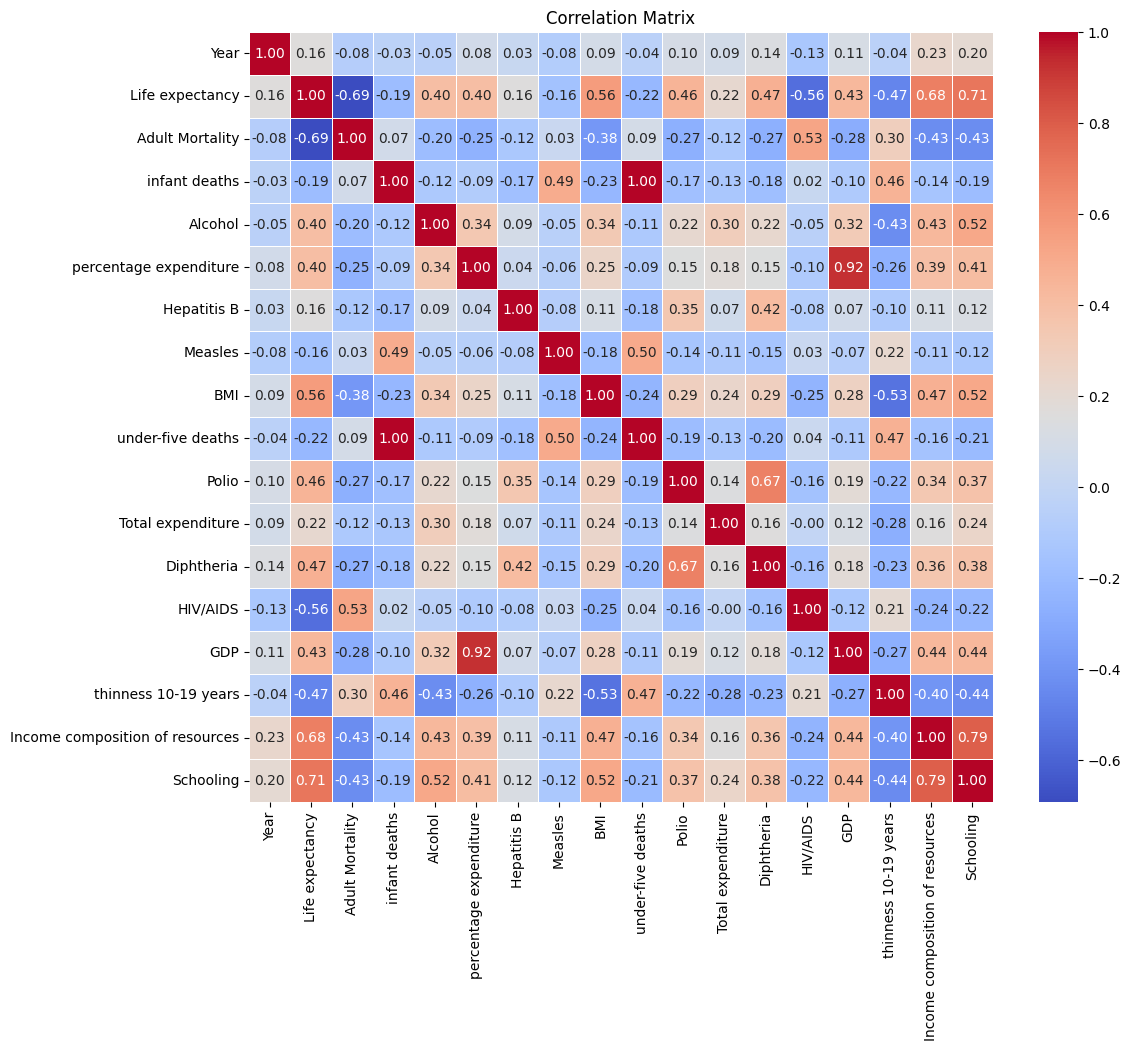

In [ ]:
# Get years 2000-2014
Y00_to_14 = lifeExpectancy_df[(lifeExpectancy_df['Year'] < 2015)]

numeric_df = Y00_to_14.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

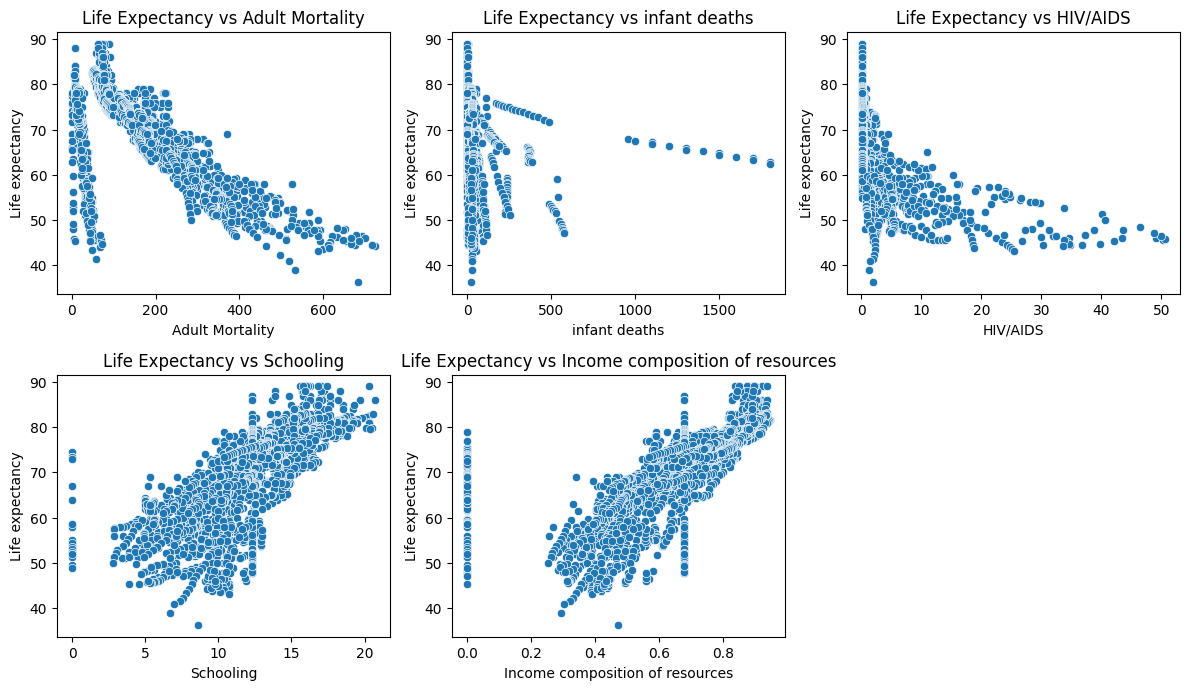

In [ ]:
# scatter plots for important relationships
important_features = ['Adult Mortality', 'infant deaths','HIV/AIDS',
                     'Schooling', 'Income composition of resources']

plt.figure(figsize=(12, 10))
for i, col in enumerate(important_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=Y00_to_14[col], y=Y00_to_14['Life expectancy'])
    plt.title(f'Life Expectancy vs {col}')

plt.tight_layout()
plt.show()


From analyzing the correlation matrix, there are a few relationships that can be observed.

---
**Life Expectancy**
*   Both income composition of resources  and schooling have high positive correlation with life expectancy, but as these two are related to HDI, a statistical composite index of life expectancy and education, it may have no real explanatory power.
*   HIV/AIDS has a high negative correlation with life expectancy. This could mean that countries that suffer from several frequent HIV/AIDS cases have lower life expectancy.
*   Adult mortality has a high negative correlation with life expectancy. This could mean that as adult mortality decreases, perhaps infant deaths increase.








# **IV. Research Question**

Based on the exploratory data analysis, we have observed emerging patterns on the relationship of different health indicators on life expectancy. Among these health indicators, we noticed that there is a very high correlation between socioeconomic factors and life expectancy.  As a result, the research question we have identified is:

**“Can we identify groups of countries with similar health and development profiles based on the available data?”**

## **Importance and Significance**

Identifying groups of countries with similar health and development profiles may be crucial for effective global health management and sustainable development. By categorizing countries based on shared health indicators such as life expectancy, and the prevalence of diseases, policymakers can better allocate resources and tailor to meet specific needs of the specified country. Moreover, grouping countries enables more targeted global health monitoring, aiding in tracking progress towards international health goals like the Sustainable Development Goals. It may also foster collaboration among stakeholders by promoting knowledge and joint research initiatives, supporting efforts to reduce health disparities and promote equitable health outcomes worldwide. Overall, the grouped heath and development profiles may be fundamental towards achieving sustainable health improvements and advancing global health equity.



# **V. Data Modelling**

Prior to conducting statistical inference, a robust data model must be established. This phase involves meticulous data preparation, including feature selection and transformation to ensure data quality and suitability for analysis. Clustering techniques, such as K-means, will be employed to identify inherent groups within the data. By grouping similar data points, the group aim to uncover underlying patterns and structures that inform subsequent statistical analysis. This modeling phase serves as a critical foundation for extracting meaningful insights and generating testable hypotheses.

## **Data Preprocessing**

 This section of the Data Modelling is to ensure data quality and suitability for subsequent analysis, therefore, a comprehensive preprocessing phase is undertaken. Moreover, this involves eliminating irrelevant columns from the dataset to streamline the analysis process. Feature scaling techniques, standardization, are applied to numerical attributes to address disparities in measurement units and ranges. Additionally, categorical variables are transformed into numerical representations using one-hot encoding to facilitate model training. To focus analysis on a specific timeframe, the dataset **`Life Expectancy Based on Different Locations`** is filtered to include data from the year 2014. These preprocessing steps are essential for creating a clean and structured dataset, enabling accurate and reliable insights.

### **Dropping Column/s of Dataset**

For this dataset, the columns that will not be used in the analysis will be dropped from the dataframe. The columns that the group has decided to include in the analysis are on the results of the correlation matrix when conducting the Exploratory Data Analysis (EDA), during the previous phase of the project. Furthermore, the group used the columns that had a higher positive or negative correlation with the Life Expectancy column, and those that indicate the socioeconomic and health profiles that would help in the analysis of the dataset.

Specifically, the columns that the group has decided to keep for the analysis are **`Adult Mortality`**, **`Alcohol`**, **`percentage expenditure`**, **`Polio`**, **`Diphtheria`**, **`HIV/AIDS`**, **`GDP`**, **`thinness 10-19 years`**, **`Income composition of resources`**, and **`Life expectancy`**. Meanwhile, the remaining columns **`infant deaths`**, **`under-five deaths`**, **`Hepatitis B`**, **`Measles`**, **`Total expenditure`**, **`Schooling`**, and **`BMI`** are to decided to be dropped from the dataframe.

In [ ]:
# Drop Columns
life_exp_cluster = lifeExpectancy_df.drop(['infant deaths',
                                            'under-five deaths',
                                            'Hepatitis B',
                                            'Measles',
                                            'Total expenditure',
                                            'Schooling',
                                            'BMI'], axis=1)

# Filter Year 2014 Data
life_exp_cluster = life_exp_cluster[life_exp_cluster['Year'] == 2014]

# Display First 5 Rows of Data
life_exp_cluster .head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Polio,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,Income composition of resources
1,Afghanistan,2014,Developing,59.9,271,0.01,73.523582,58.0,62.0,0.1,612.696514,17.5,0.476
17,Albania,2014,Developing,77.5,8,4.51,428.749067,98.0,98.0,0.1,4575.763787,1.2,0.761
33,Algeria,2014,Developing,75.4,11,0.01,54.237318,95.0,95.0,0.1,547.851700,6.0,0.741
49,Angola,2014,Developing,51.7,348,8.33,23.965612,68.0,64.0,2.0,479.312240,8.5,0.527
65,Antigua and Barbuda,2014,Developing,76.2,131,8.56,2422.999774,96.0,99.0,0.2,12888.296670,3.3,0.782


In [ ]:
life_exp_cluster.shape

(183, 13)

### **Feature Scaling**

The Exploratory Data Analysis (EDA) has previously revealed a strong correlation between socioeconomic factors and life expectancy, prompting the research question: "Can we identify groups of countries with similar health and development profiles based on the available data?". K-means clustering will be employed by the group as a clustering technique to address this. However, due to the sensitivity of Euclidean distance to variable scales, data standardization through scaling techniques will be applied prior to clustering to ensure accurate and meaningful results from the dataset.

Thus, the code below [1] Selects the previously mentioned columns to include in data analysis: **`Adult Mortality`**, **`Alcohol`**, **`percentage expenditure`**, **`Polio`**, **`Diphtheria`**, **`HIV/AIDS`**, **`GDP`**, **`thinness 10-19 years`**, **`Income composition of resources`**, and **`Life expectancy`**, and [2] Applies standardization to these columns.

In [ ]:
# Select Columns to Standardize
columns_to_standardize = ['Adult Mortality',
                          'Alcohol',
                          'percentage expenditure',
                          'Polio',
                          'Diphtheria',
                          'HIV/AIDS',
                          'GDP',
                          'thinness 10-19 years',
                          'Income composition of resources',
                          'Life expectancy']
# Instance of StandardScaler
scaler = StandardScaler()

# Apply Standardization on Columns
life_exp_cluster[columns_to_standardize] = scaler.fit_transform(life_exp_cluster[columns_to_standardize])

# Display First 5 Rows of Data
life_exp_cluster.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Polio,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,Income composition of resources
1,Afghanistan,2014,Developing,-1.363015,1.156769,-0.789850,-0.364603,-1.284218,-0.961344,-0.420387,-0.472881,3.159750,-1.422710
17,Albania,2014,Developing,0.698501,-1.330571,0.299083,-0.225096,0.637777,0.605925,-0.420387,-0.242666,-0.807928,0.491968
33,Algeria,2014,Developing,0.452525,-1.302198,-0.789850,-0.372177,0.493627,0.475319,-0.420387,-0.476647,0.360468,0.357605
49,Angola,2014,Developing,-2.323493,1.885001,1.223466,-0.384065,-0.803719,-0.874273,0.952089,-0.480629,0.969008,-1.080083
65,Antigua and Barbuda,2014,Developing,0.546230,-0.167290,1.279123,0.558098,0.541677,0.649460,-0.348152,0.240209,-0.296754,0.633050


### **One Hot Encoding**

In order to ensure compatibility of the data for performing clustering, which predominantly operate on numerical data, categorical variables such as **`Status`** need to be transformed into a numerical format. One-Hot Encoding is a common technique employed for this purpose which will be utilized by the group for this project. It involves converting each categorical value into a binary feature, where 1 indicates the presence of a specific category and 0 signifies its absence. By applying One-Hot Encoding to categorical variables, the group prepares the data for subsequent modeling and analysis.

In [ ]:
# Instance of OneHotEncoder
encoder = OneHotEncoder()

# Transform Column to One Hot Encoded Representation
status_encoded = encoder.fit_transform(life_exp_cluster[['Status']]).toarray()

# Convert to DataFrame
status_encoded_df = pd.DataFrame(status_encoded, columns=encoder.get_feature_names_out(['Status']))

# Concatenate Original with Encoded DataFrame
life_exp_cluster = pd.concat([life_exp_cluster.reset_index(drop=True), status_encoded_df.reset_index(drop=True)], axis=1)

# Drop Original Column
life_exp_cluster = life_exp_cluster.drop('Status', axis=1)

## **Selecting Optimal Number of Clusters**

While K-means clustering offers a straightforward approach to group similar data points, determining the optimal number of clusters (k) is crucial for meaningful results. A natural inclination might be to classify countries based solely on their development status (developed or developing), but this binary approach may oversimplify the complex interplay of factors influencing life expectancy within the dataset. This may make it challenging to create distinct clusters. Thus, the group will employ the elbow method and silhouette analysis techniques.

*   The **`elbow method`** involves plotting the within-cluster sum of squares against the number of clusters, identifying the "elbow" where the rate of decrease in the sum of squares begins to level off.
*   The **`silhouette analysis`** evaluates the quality of clustering by assessing how well-separated clusters are.

By combining these techniques, the group aim to determine the optimal number of clusters for the **`Life Expectancy Based on Different Locations`** dataset, allowing for a deeper understanding of the underlying patterns and relationships among countries.

### **Elbow Method**


As previously stated, identifying the optimal number of clusters is crucial to effectively segment the data into meaningful clusters. The elbow method, a commonly used heuristic, will be employed for this purpose. This technique involves plotting the within-cluster sum of squares (WCSS) against the number of clusters (k).

The WCSS measures the compactness of clusters, with lower values indicating tighter clusters. Moreover, the "elbow" in the plot—where the rate of decrease in WCSS begins to level off—often signifies the optimal number of clusters. By identifying this point, we aim to balance the trade-off between having too few or too many clusters, ultimately leading to a more accurate and informative clustering solution.

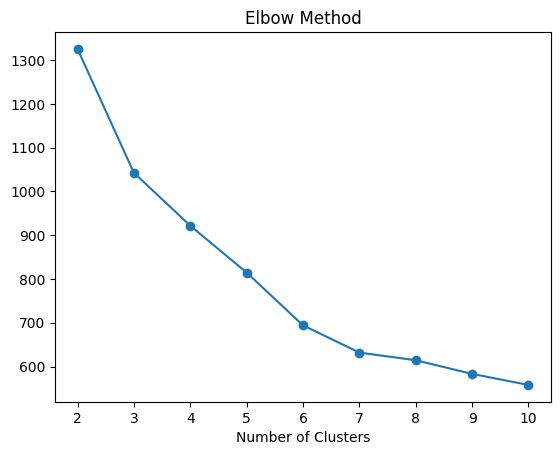

In [ ]:
# Set Range of Potential Cluster Numbers (k) to explore
clusters = list(range(2,11))

# List to Stores Within-Cluster Sum of Squares
ssd = []

# Drop Columns
view_cluster = life_exp_cluster.drop(['Country', 'Year'], axis=1)

# Compute Within-Cluster Sum of Squares for Different Numbers of Clusters
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=50, n_init='auto')
    kmeans.fit(view_cluster)
    ssd.append(kmeans.inertia_)

# Display Plot Graph
plt.plot(clusters, ssd, marker='o')
plt.xlabel('Number of Clusters')
plt.title('Elbow Method')
plt.show()

Application of the elbow method suggests that an **optimal number of three clusters (k=3)** is suitable for segmenting the data. This determination is based on the **point of inflection** in the resulting plot above, where the rate of decrease in within-cluster sum of squares begins to decrease significantly. However, to support the optimality of the initial result for the number of clusters, the group will also perform the Silhouette Score Analysis below.

### **Silhouette Score Analysis**

As previously mentioned above, the group computed the silhouette score to compute the distance of each point in one cluster to points in another cluster to further support the choice for the optimal number of clusters to be formed—initially determined by the Elbow Method as 3 clusters (k=3).

The Silhouette scores results in a range of [-1, 1]. Numbers closer to +1 indicate that the clustered data has a tendancy to be far from data poins of another cluster, whereas, a value closer to 0 indicates that the sample is close to another cluster. On the other hand, a value closer to -1 would indicate that the samples would have been assigned to the wrong clusters.

Silhouette Score for 2 clusters: 0.3126756721347841
Silhouette Score for 3 clusters: 0.33353570554398515
Silhouette Score for 4 clusters: 0.25341454825762233
Silhouette Score for 5 clusters: 0.28488806623769736
Silhouette Score for 6 clusters: 0.28329214696710087
Silhouette Score for 7 clusters: 0.2683879574012729
Silhouette Score for 8 clusters: 0.23624874456544548
Silhouette Score for 9 clusters: 0.241916630450038
Silhouette Score for 10 clusters: 0.24159396654640275


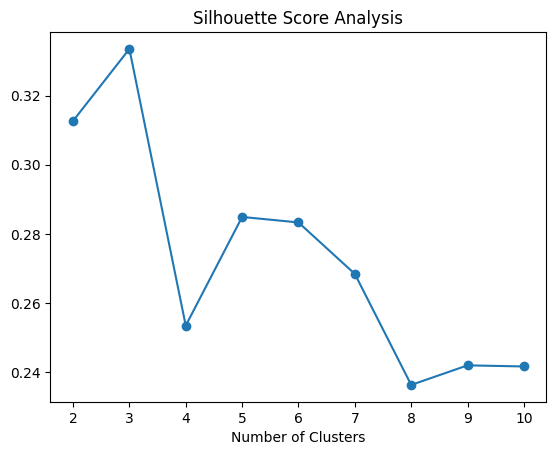

In [ ]:
# Set Range of Potential cluster numbers (k) to explore
clusters = list(range(2,11))

# List to store silhouette scores for each k
silhouette_scores = []

# Computes Silhouette Score for Different Numbers of Clusters
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(view_cluster)
    silhouette_scores.append(silhouette_score(view_cluster, labels))
    print(f'Silhouette Score for {k} clusters: {silhouette_scores[-1]}')

# Display Silhouette Scores
plt.plot(clusters, silhouette_scores, marker='o')

# Display Plot Graph
plt.xlabel('Number of Clusters')
plt.title('Silhouette Score Analysis')
plt.show()

The silhouette coefficient was calculated for a range of k values (2 to 10), to determine the optimal number of clusters. The results indicate that **a cluster count of three (k=3) yielded the highest silhouette score of 0.33** as seen in the plot and printed results above. This suggests a **reasonable balance between cluster cohesion and separation, supporting the earlier findings from the Elbow method above**—which initially determined the optimal number of clusters for this dataset to be three (k=3).

## **K means Clustering**

Building upon the previously preprocessed data above, the next phase involves applying K-means clustering to identify distinct groups of countries based on their health and development profiles. This unsupervised learning technique will group countries with similar characteristics, enabling the exploration of underlying patterns within the data. By understanding these clusters, the group can gain valuable insights into the factors influencing health outcomes across different regions.

In [ ]:
# Optimal Number of Clusters
k = 3

# Starting Column Index for Clustering (Excluding 'Country' and 'Year', Index 0 and 1)
start_var = 2

# Ending Column Index for Clustering (Excluding 'Country' and 'Year', Index 0 and 1)
end_var = life_exp_cluster.shape[1]

# KMeans Object
kmeans = KMeans_phase2(k=k, start_var=start_var, end_var=end_var, num_observations=life_exp_cluster.shape[0], data=life_exp_cluster)

# Train KMeans Model
clusters = kmeans.train(data=life_exp_cluster, iters=100)

# Add Cluster Labels
life_exp_cluster['Cluster'] = clusters

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Done clustering!


## **Cluster Profile**

Prior to conducting an in-depth analysis of the identified clusters, the dataset must be reverted to its original state by reinstating the pre-processed columns and reversing the one-hot encoding process. This step ensures that the subsequent analysis is performed on the original data structure, preventing any unintended biases introduced during the pre-processing stage. By restoring the data to its original form, the group can accurately characterize the clusters and gain valuable insights into the underlying patterns within the data.

In [ ]:
# Select Columns To Revert
columns_to_revert = ['Adult Mortality',
                      'Alcohol',
                      'percentage expenditure',
                      'Polio',
                      'Diphtheria',
                      'HIV/AIDS',
                      'GDP',
                      'thinness 10-19 years',
                      'Income composition of resources',
                      'Life expectancy']

# Revert Back To Original Values
life_exp_cluster[columns_to_revert] = scaler.inverse_transform(life_exp_cluster[columns_to_revert])

# Display First 5 Rows of Data
life_exp_cluster.head(5)

,Country,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Polio,Diphtheria,HIV/AIDS,GDP,thinness 10-19 years,Income composition of resources,Status_Developed,Status_Developing,Cluster
0,Afghanistan,2014,59.9,271.0,0.01,73.523582,58.0,62.0,0.1,612.696514,17.5,0.476,0.0,1.0,2
1,Albania,2014,77.5,8.0,4.51,428.749067,98.0,98.0,0.1,4575.763787,1.2,0.761,0.0,1.0,0
2,Algeria,2014,75.4,11.0,0.01,54.237318,95.0,95.0,0.1,547.851700,6.0,0.741,0.0,1.0,0
3,Angola,2014,51.7,348.0,8.33,23.965612,68.0,64.0,2.0,479.312240,8.5,0.527,0.0,1.0,2
4,Antigua and Barbuda,2014,76.2,131.0,8.56,2422.999774,96.0,99.0,0.2,12888.296670,3.3,0.782,0.0,1.0,0


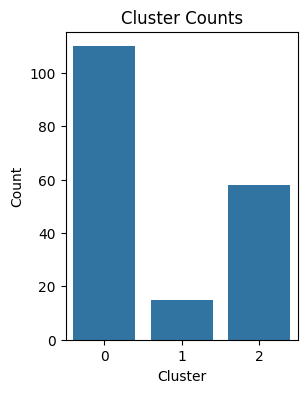

In [ ]:
# Count Cluster Label Occurence
cluster_counts = life_exp_cluster['Cluster'].value_counts()

# Display Bar Chart
plt.figure(figsize=(3, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

To understand the characteristics of the clusters, a detailed analysis of their composition is essential. Examining the countries within each cluster provides insights into the factors driving these groupings. By cross-referencing cluster membership with other relevant datasets, such as economic indicators, health outcomes, and geographical location, a comprehensive profile of each cluster can be developed. This analysis will help uncover underlying patterns and relationships among countries within the same cluster, contributing to a deeper understanding of the factors influencing life expectancy.

In [ ]:
# Create 3 DataFrame Containing Rows That Belong To Each Cluster
cluster_0 = life_exp_cluster[life_exp_cluster['Cluster'] == 0]
cluster_1 = life_exp_cluster[life_exp_cluster['Cluster'] == 1]
cluster_2 = life_exp_cluster[life_exp_cluster['Cluster'] == 2]

# Display Number of DataPoints Per Cluster
print('Number of data points in each cluster:')

# Cluster 0
print('Cluster 0:')
print('  Developed:\t', cluster_0[cluster_0['Status_Developed'] == 1].shape[0])
print('  Developing:\t', cluster_0.loc[cluster_0['Status_Developing'] == 1].shape[0])
print('  Total:\t', cluster_0.shape[0])

# Cluster 1
print('Cluster 1:')
print('  Developed:\t', cluster_1[cluster_1['Status_Developed'] == 1].shape[0])
print('  Developing:\t', cluster_1.loc[cluster_1['Status_Developing'] == 1].shape[0])
print('  Total:\t', cluster_1.shape[0])

# Cluster 2
print('Cluster 2:')
print('  Developed:\t', cluster_2[cluster_2['Status_Developed'] == 1].shape[0])
print('  Developing:\t', cluster_2.loc[cluster_2['Status_Developing'] == 1].shape[0])
print('  Total:\t', cluster_2.shape[0])

Number of data points in each cluster:
Cluster 0:
  Developed:	 22
  Developing:	 88
  Total:	 110
Cluster 1:
  Developed:	 10
  Developing:	 5
  Total:	 15
Cluster 2:
  Developed:	 0
  Developing:	 58
  Total:	 58


In [ ]:
# Display First 110 Countries from Cluster 0
cluster_0['Country'].head(110)

1                                 Albania
2                                 Algeria
4                     Antigua and Barbuda
5                               Argentina
6                                 Armenia
                      ...                
175                               Uruguay
176                            Uzbekistan
177                               Vanuatu
178    Venezuela (Bolivarian Republic of)
179                              Viet Nam
Name: Country, Length: 110, dtype: object

In [ ]:
# Display First 110 Countries from Cluster 1
cluster_1['Country'].head(110)

7                 Australia
8                   Austria
15                  Belgium
46                  Denmark
57                  Finland
58                   France
73                  Iceland
79                   Israel
80                    Italy
96               Luxembourg
114             Netherlands
129                   Qatar
144               Singapore
157             Switzerland
171    United Arab Emirates
Name: Country, dtype: object

In [ ]:
# Display First 110 Countries from Cluster 2
cluster_2['Country'].head(110)

0                           Afghanistan
3                                Angola
12                           Bangladesh
17                                Benin
18                               Bhutan
21                             Botswana
25                         Burkina Faso
26                              Burundi
27                        Côte d'Ivoire
30                             Cameroon
32             Central African Republic
33                                 Chad
36                             Colombia
37                              Comoros
38                                Congo
45     Democratic Republic of the Congo
47                             Djibouti
52                    Equatorial Guinea
53                              Eritrea
55                             Ethiopia
59                                Gabon
60                               Gambia
63                                Ghana
67                               Guinea
68                        Guinea-Bissau


In the preliminary analysis of all the clusters above, **Cluster 2 suggests a potential grouping of least developed countries**. To confirm this, a more in-depth examination of the countries within this cluster is necessary. Thus, as previously mentioned above, exploring other socio-economic indicators and development metrics within this cluster can provide further insights into the characteristics of these countries and the factors influencing their life expectancy.

# **VI. Statistical Inference**

This final phase of the project will employ statistical inference techniques to provide robust evidence supporting the identified clusters and their implications for life expectancy. This involves conducting hypothesis tests to determine if the observed differences in life expectancy between the clusters are statistically significant.

Specifically, a One-way ANOVA will be utilized to compare the means of life expectancy across the different clusters. Prior to conducting the ANOVA, assumptions regarding the data, such as normality, will be assessed and addressed accordingly. By applying statistical inference, the group aim to strengthen the credibility of the findings and draw meaningful conclusions about the relationship between cluster membership and life expectancy.

## **Data Preprocessing**

Since we intend to use One-way ANOVA to compare the `Life expectancy` among the different groups, it is important to check whether the following assumptions are met:


1.  Independence of observations
2.  Normally Distributed

For this study, each country's life expectancy will be treated as independent of other country's life expectancy.

### **Checking Normal Distribution**

To apply One-way ANOVA, it is important to check if the data is normally distributed. In the code snippet below, we check the mean, median and standard deviation of each group.

In [ ]:
# Group DataFrame By Cluster and Compute the Life Expectancy Cluster Summary
cluster_summary = life_exp_cluster.groupby('Cluster').agg({ 'Life expectancy': ['mean', 'median', 'std', 'count']})

# Display the Computed Cluster Summary
print(cluster_summary)

        Life expectancy                       
                   mean median       std count
Cluster                                       
0             75.267273  74.80  4.734707   110
1             82.666667  82.50  3.166942    15
2             61.582759  62.05  5.329071    58


We can plot a histogram and compute the skew for the life expectancy of each cluster to see the distribution.

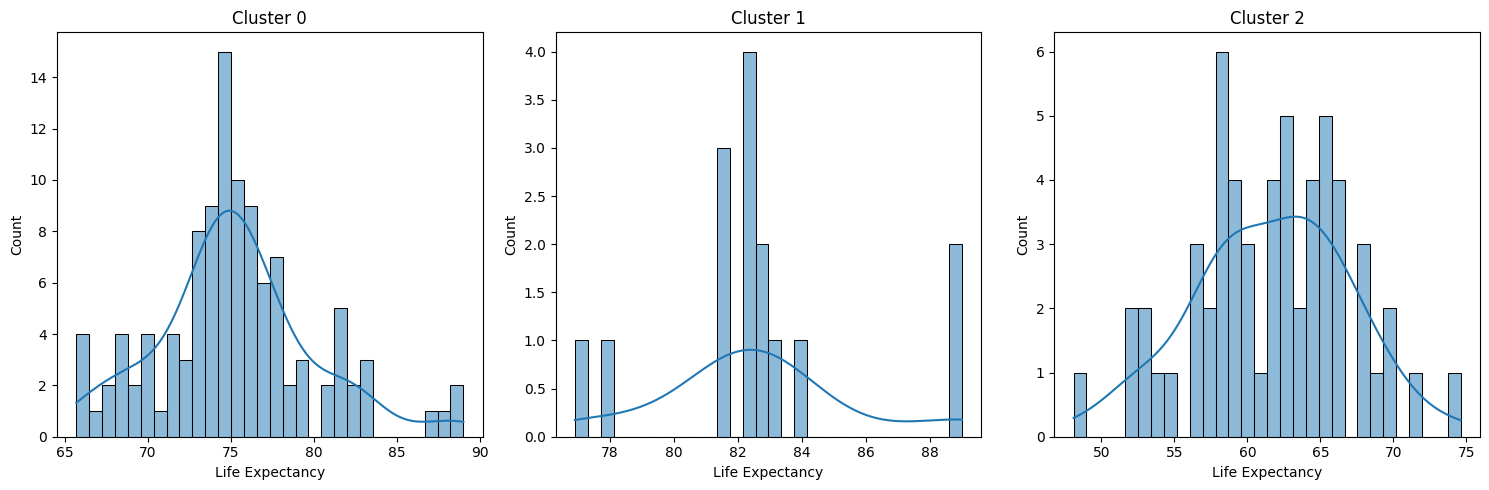

Skew of Cluster 0:  0.505077680329213
Skew of Cluster 1:  0.5696951374645355
Skew of Cluster 2:  -0.15284378486289854


In [ ]:
# Figure of 3 Subplots
figure, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Create Histogram Per Subplot
for i in range(3):
  sns.histplot(data=life_exp_cluster[life_exp_cluster['Cluster'] == i], x='Life expectancy', kde=True, bins=30, ax=axs[i])
  axs[i].set_title(f'Cluster {i}')
  axs[i].set_xlabel('Life Expectancy')
  axs[i].set_ylabel('Count')

# Prevent Overlapping
plt.tight_layout()

# Display Histogram
plt.show()

# Print Skewness of Life Expectancy Per Cluster
print('Skew of Cluster 0: ', cluster_0['Life expectancy'].skew())
print('Skew of Cluster 1: ', cluster_1['Life expectancy'].skew())
print('Skew of Cluster 2: ', cluster_2['Life expectancy'].skew())

Through the histogram and the skew, we can see that the data in the clusters are not normally distributed. We can also visualize whether the data is normally distributed through plotting a Q-Q Plot.

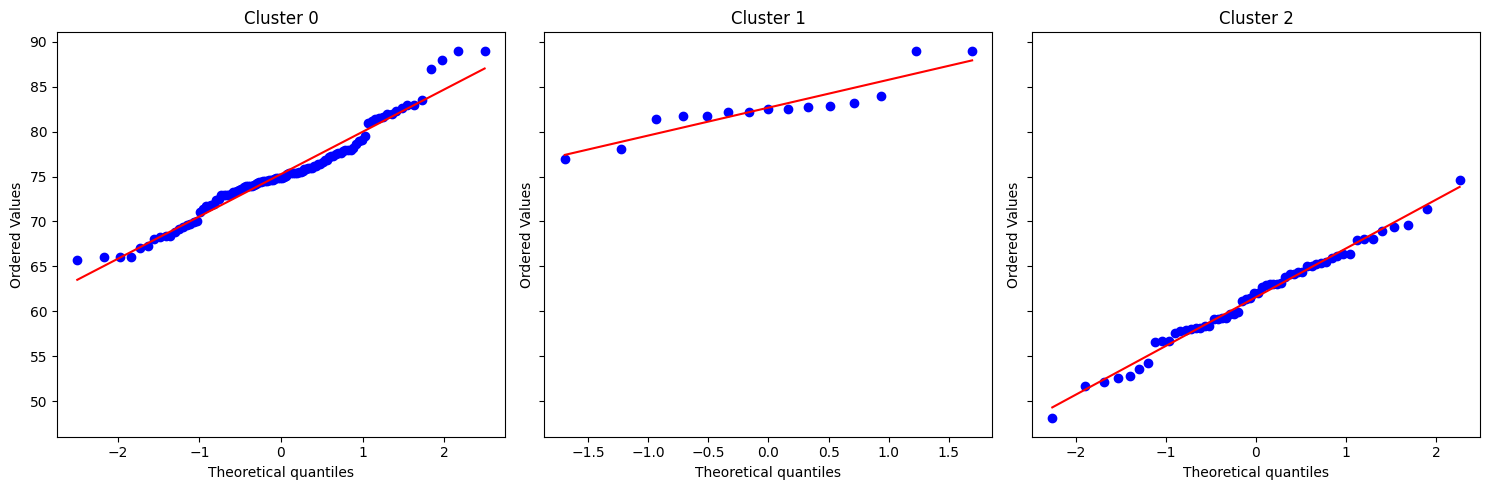

In [ ]:
# Figure of 3 Subplots
figure, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Generate Cluster 0 Q-Q Plot
stats.probplot(cluster_0['Life expectancy'], dist="norm", plot=axs[0])
axs[0].set_title('Cluster 0')

# Generate Cluster 1 Q-Q Plot
stats.probplot(cluster_1['Life expectancy'], dist="norm", plot=axs[1])
axs[1].set_title('Cluster 1')

# Generate Cluster 2 Q-Q Plot
stats.probplot(cluster_2['Life expectancy'], dist="norm", plot=axs[2])
axs[2].set_title('Cluster 2')

# Prevent Overlapping
plt.tight_layout()

# Display Plot Graph
plt.show()

Log transformation can be applied to cluster 0 and cluster 1 to make the data more normally distributed.

In [ ]:
# Apply Natural Logarithmic Functions to Clusters
cluster_0['Life expectancy'] = np.log(cluster_0['Life expectancy'])
cluster_1['Life expectancy'] = np.log(cluster_1['Life expectancy'])

<ipython-input-53-cd89f57ce77b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_0['Life expectancy'] = np.log(cluster_0['Life expectancy'])
<ipython-input-53-cd89f57ce77b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1['Life expectancy'] = np.log(cluster_1['Life expectancy'])


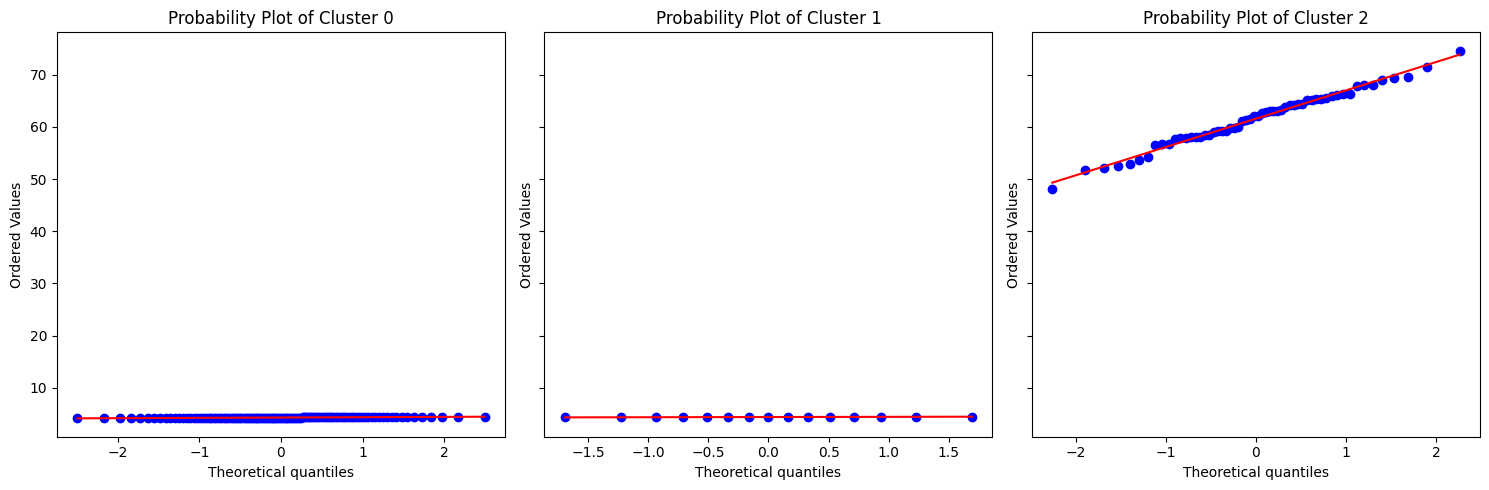

In [ ]:
# Figure of 3 Subplots
figure, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Generate Cluster 0 Probability Plot
stats.probplot(cluster_0['Life expectancy'], dist="norm", plot=axs[0])
axs[0].set_title('Probability Plot of Cluster 0')

# Generate Cluster 1 Probability Plot
stats.probplot(cluster_1['Life expectancy'], dist="norm", plot=axs[1])
axs[1].set_title('Probability Plot of Cluster 1')

#Generate Cluster 2 Probability Plot
stats.probplot(cluster_2['Life expectancy'], dist="norm", plot=axs[2])
axs[2].set_title('Probability Plot of Cluster 2')

# Prevent Overlapping
plt.tight_layout()

# Display Plot Graph
plt.show()

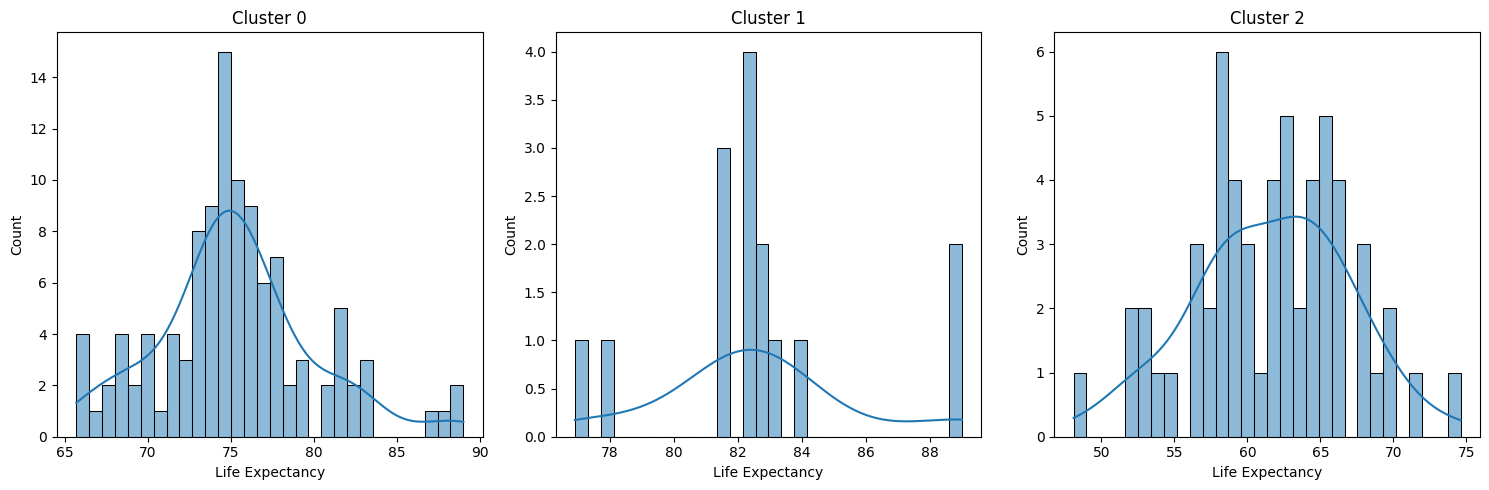

Skew of Cluster 0:  0.27369110235206723
Skew of Cluster 1:  0.4214986342734043
Skew of Cluster 2:  -0.15284378486289854


In [ ]:
# Figure of 3 Subplots
figure, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Create Histogram Per Subplot
for i in range(3):
  sns.histplot(data=life_exp_cluster[life_exp_cluster['Cluster'] == i], x='Life expectancy', kde=True, bins=30, ax=axs[i])
  axs[i].set_title(f'Cluster {i}')
  axs[i].set_xlabel('Life Expectancy')
  axs[i].set_ylabel('Count')

# Prevent Overlapping
plt.tight_layout()

# Display Histogram
plt.show()

# Print Skewness of Life Expectancy Per Cluster
print('Skew of Cluster 0: ', cluster_0['Life expectancy'].skew())
print('Skew of Cluster 1: ', cluster_1['Life expectancy'].skew())
print('Skew of Cluster 2: ', cluster_2['Life expectancy'].skew())

## **One Way ANOVA**

One way ANOVA can be used to compare the means of different clusters for a continuous variable, such as "Life Expectancy".

Before we do this, we must first declare our null and alternative hypothesis:

> **H₀**: There is no significant difference in the mean life expectancy among the three clusters.


> **Hₐ**: At least one of the three clusters has a significant difference in its mean life expectancy.

In [ ]:
# Perform One-Way ANOVA Test for Life Expectancy
anova_results = stats.f_oneway(
    life_exp_cluster[life_exp_cluster['Cluster'] == 0]['Life expectancy'],
    life_exp_cluster[life_exp_cluster['Cluster'] == 1]['Life expectancy'],
    life_exp_cluster[life_exp_cluster['Cluster'] == 2]['Life expectancy']
)

# Print the ANOVA results (F-statistic and p-value)
print(f'ANOVA results for Life Expectancy: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}')


ANOVA results for Life Expectancy: F-statistic = 195.64174023916544, p-value = 7.2090082508221e-46


The ANOVA results show an F-statistic of 195.64174023916544 and a p-value of 7.2090082508221e-46. Given that the p-value is significantly smaller than any common significance level (e.g., 0.05), we reject the null hypothesis. The evidence strongly suggests that there is at least one cluster with a significant difference in its mean life expenctancy.


To know which cluster/s have a significant difference, we can use the Bonferroni Correction.

In [ ]:
# Significance Level for Hypothesis Testing
alpha = 0.05

# Extract Life Expectancy Data
cluster_0_life_exp = cluster_0['Life expectancy']
cluster_1_life_exp = cluster_1['Life expectancy']
cluster_2_life_exp = cluster_2['Life expectancy']

# Perform Pairwise T-tests
t_stat_01, p_val_01 = ttest_ind(cluster_0_life_exp, cluster_1_life_exp)
t_stat_02, p_val_02 = ttest_ind(cluster_0_life_exp, cluster_2_life_exp)
t_stat_12, p_val_12 = ttest_ind(cluster_1_life_exp, cluster_2_life_exp)

# Array of p-values for All Pairwise Comparisons
p_values = np.array([p_val_01, p_val_02, p_val_12])

# Calculate Pairwise Comparisons
num_comparisons = len(p_values)

# Calculate Bonferroni Adjusted alpha Level
bonferroni_alpha = alpha / num_comparisons

# Determine Significant Comparisons
significant_results = p_values < bonferroni_alpha

# Print Pairwise Comparison Results
comparison_pairs = [(0, 1), (1, 2), (0, 2)]
for i, (pair, p_val, is_significant) in enumerate(zip(comparison_pairs, p_values, significant_results)):
    result_str = 'significant' if is_significant else 'not significant'
    print(f'Comparison: Cluster {pair[0]} vs. Cluster {pair[1]}, Original p-value: {p_val}, Bonferroni adjusted significance level: {bonferroni_alpha}, Result: {result_str}')

Comparison: Cluster 0 vs. Cluster 1, Original p-value: 6.588260208959898e-08, Bonferroni adjusted significance level: 0.016666666666666666, Result: significant
Comparison: Cluster 1 vs. Cluster 2, Original p-value: 6.196593588367876e-159, Bonferroni adjusted significance level: 0.016666666666666666, Result: significant
Comparison: Cluster 0 vs. Cluster 2, Original p-value: 2.0817425934028717e-51, Bonferroni adjusted significance level: 0.016666666666666666, Result: significant


Based on the findings above, all three pairwise comparisons between clusters show statistically significant differences in life expectancy. This implies that the life expectancy values for each cluster are distinct from each other, supporting our initial finding from the ANOVA test.



---



We can use a Chi-Square test to compare the distribution of the 'Status' (Developed/Developing) across different clusters.

**H₀**: The distribution of 'Status' (Developed/Developing) is independent of the clusters. This means there is no significant association between the clusters and the 'Status' of the countries.

**Hₐ**: The distribution of 'Status' (Developed/Developing) is not independent of the clusters. This means there is a significant association between the clusters and the 'Status' of the countries.


In [ ]:
# Create Contingency Table
contingency_table = pd.crosstab(life_exp_cluster['Cluster'], life_exp_cluster['Status_Developed'])

# Perform Chi-Square Test
chi2_results = stats.chi2_contingency(contingency_table)

# Print Chi-Square Results (Chi2 statistic and p-value)
print(f'Chi-Square results: Chi2 statistic = {chi2_results[0]}, p-value = {chi2_results[1]}')


Chi-Square results: Chi2 statistic = 37.91796357615895, p-value = 5.837391574534307e-09


Analysis:
The p-value (5.837391574534307e-09) is less than the significance level (0.05).
We reject the null hypothesis.

Conclusion: There is a significant association between the clusters and the 'Status' of the countries.

# **VII. Insights and Conclusion**

Based on the exploratory data analysis and subsequent data modeling, several key insights and conclusions were derived from the research question, "Can we identify groups of countries with similar health and development profiles based on the available data?"

### **Correlation Between Socioeconomic Factors and Life Expectancy**

The exploratory data analysis revealed a correlation between various socioeconomic factors and life expectancy. Notably, indicators such as GDP, income composition of resources, and health expenditure showed significant relationships with life expectancy. This underscores the importance of socioeconomic development in improving health outcomes and extending life expectancy.

### **Optimal Number of Clusters**


Using the elbow method and silhouette score analysis, the optimal number of clusters was determined to be three. The elbow method suggested that k=3 is the point where the sum of squared distances begins to plateau, indicating diminishing returns for additional clusters. This was further supported by the silhouette score analysis, where k=3 yielded the highest silhouette score of 0.33, indicating well-separated and cohesive clusters.

### **Cluster Profiles**

Three distinct clusters were identified:

- **Cluster 0** — Comprised predominantly of developing countries (88 developing, 22 developed). This cluster had an average life expectancy of 75.27 years. Countries in this cluster exhibited moderate levels of socioeconomic development and health indicators.

- **Cluster 1** — Consisted mainly of developed countries (10 developed, 5 developing). This cluster had the highest average life expectancy of 82.67 years, indicating the best health and development profiles. These countries had high GDP, significant health expenditures, and better overall health outcomes.

- **Cluster 2** — Included only developing countries (58 developing). This cluster had the lowest average life expectancy of 61.58 years, reflecting poorer health outcomes and lower socioeconomic development. These countries faced significant health challenges and lower economic resources.

### **Statistical Analysis**

In [ ]:
print(f'ANOVA results for Life Expectancy: F-statistic = {anova_results.statistic}, p-value = {anova_results.pvalue}')

ANOVA results for Life Expectancy: F-statistic = 195.64174023916544, p-value = 7.2090082508221e-46


A one-way ANOVA test was conducted to compare the means of life expectancy across the three clusters. The test revealed statistically significant differences among the clusters (p-value < 0.05). This confirms that the clusters represent distinct groups with significantly different life expectancies, validating the clustering approach.

### **Distribution and Normality Check**

The distribution of life expectancy within each cluster was analyzed. Histograms and Q-Q plots indicated that the life expectancy data was not normally distributed. Log transformation was applied to the data to improve normality, particularly for Clusters 0 and 1. Post-transformation, the skewness of the data was reduced, making it more suitable for ANOVA analysis.

### **Conclusion**

The study conclusively demonstrated that it is possible to identify distinct groups of countries with similar health and development profiles based on the available data. The clustering analysis revealed three significant groups with varying health outcomes and socioeconomic characteristics. Statistical evidence, including strong correlations and significant ANOVA test results, supports these findings.

### **Implications**


These insights have substantial implications for global health management and policy-making. By identifying clusters of countries with similar profiles, policymakers can design targeted interventions tailored to the specific needs of each group. This approach enables more effective resource allocation and strategic planning to address health disparities and promote equitable health outcomes worldwide.

# **VIII. References**

> Saji, B. (2021, January 20). *Elbow Method for Optimal Cluster Number in K-Means*. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/

> *Selecting the number of clusters with silhouette analysis on KMeans clustering*. (n.d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

> Sharma, P. (2019, August 19). *Introduction to K-Means Clustering*. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/#:~:text=K%2Dmeans%20clustering%2C%20originating%20from,a%20representative%20of%20that%20cluster.

> Vasudev. (2017, August 3). *What is One Hot Encoding? Why And When do you have to use it?* Hackernoon. https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

## **Use of Generative AI and AI-assisted Technologies in the Writing Process**

During the preparation of this work the authors of this project used **GOOGLE COLAB AI** in order to **HELP GENERATE SOME OF THE GRAPHICAL VISUALIZATION**. After using this tool/service, the authors reviewed and edited the content
as needed and take full responsibility for the content of the publication.